In [56]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import os

In [57]:
# Results path and file name

experiment = 'Test_Paper_HW'
path = './Results/' 
path_figures = './Results/Figures/'

# Predictive dataframe path and file name
pred_path = './Data/Paper/'
pred_file = 'predictors_dataset.csv'

In [58]:
# Read the predictive variables dataframe

pred_dataframe_opt = pd.read_csv(pred_path+pred_file, index_col=0)
pred_dataframe_opt.index = pd.to_datetime(pred_dataframe_opt.index)

In [59]:
# Read labels

import os
files_labels = os.listdir(pred_path)
files_labels = [file for file in files_labels if file.startswith('label')]
files_labels.sort()
files_labels

['labelsmslEurope5.csv',
 'labelsmslWorld5.csv',
 'labelsolrNorth_Atlantic5.csv',
 'labelsolrWorld5.csv',
 'labelssicArtic5.csv',
 'labelssm1Europe5.csv',
 'labelssstNorth_Atlantic5.csv',
 'labelssstWorld5.csv',
 'labelst2mEurope5.csv',
 'labelstpEurope5.csv',
 'labelsz500Europe5.csv',
 'labelsz500World5.csv']

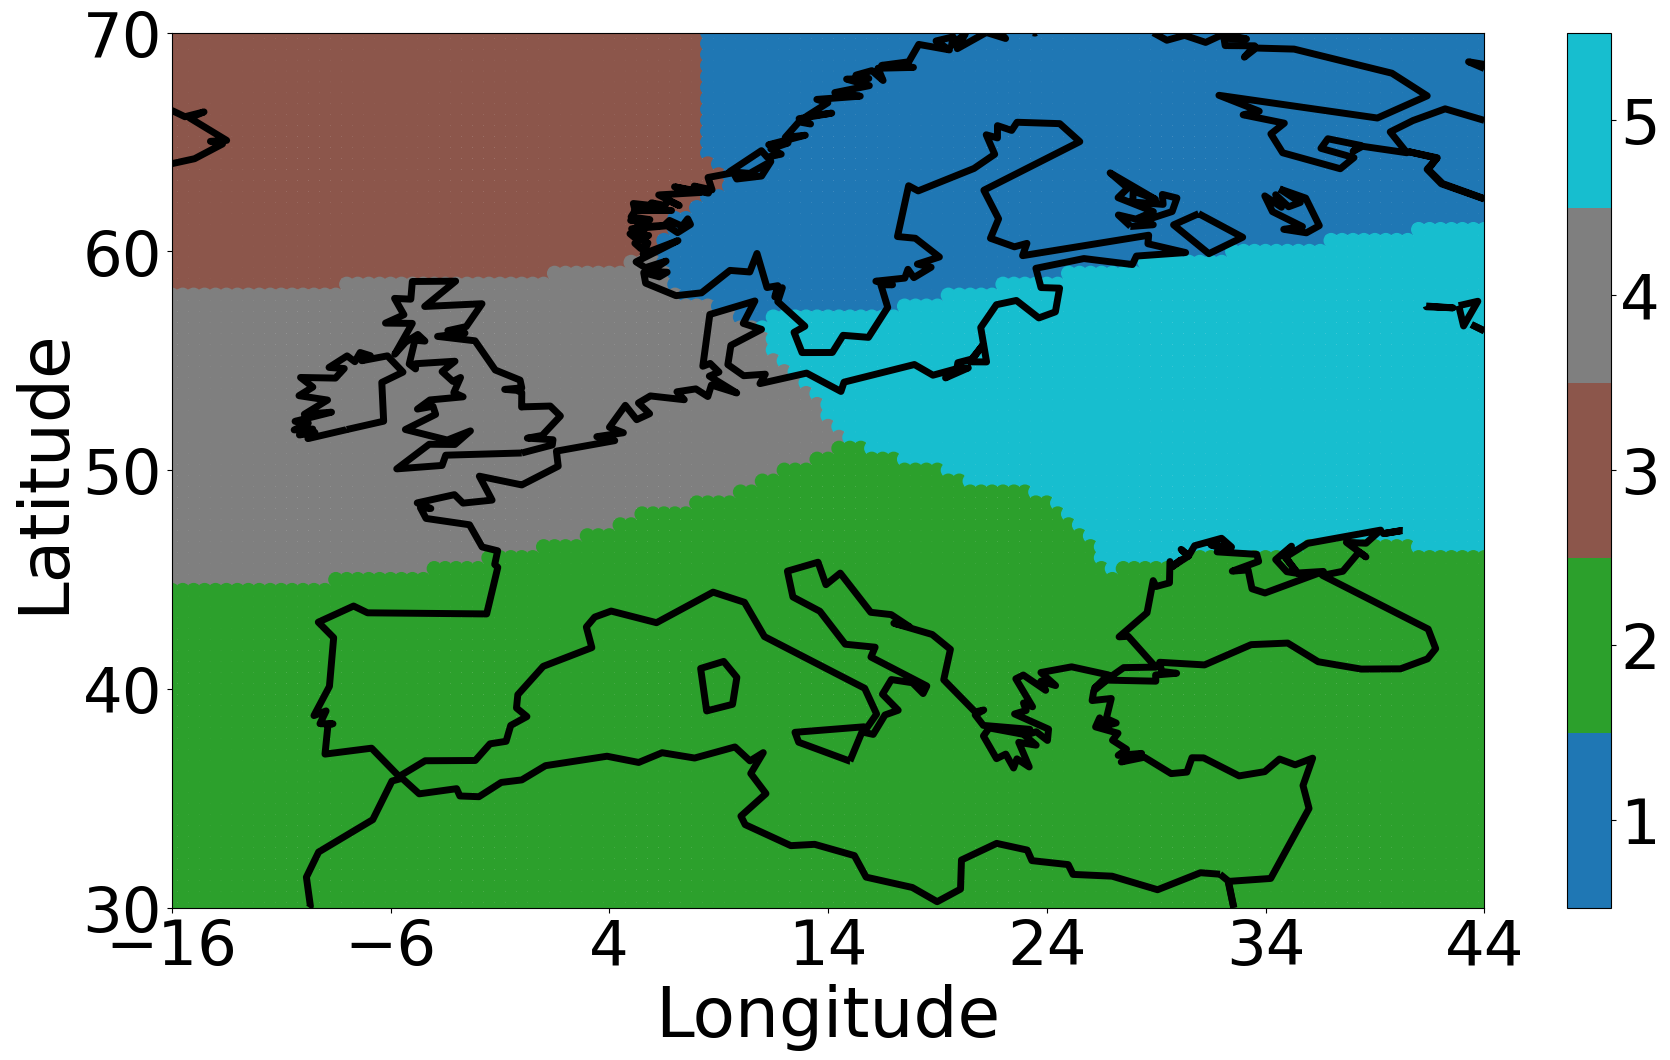

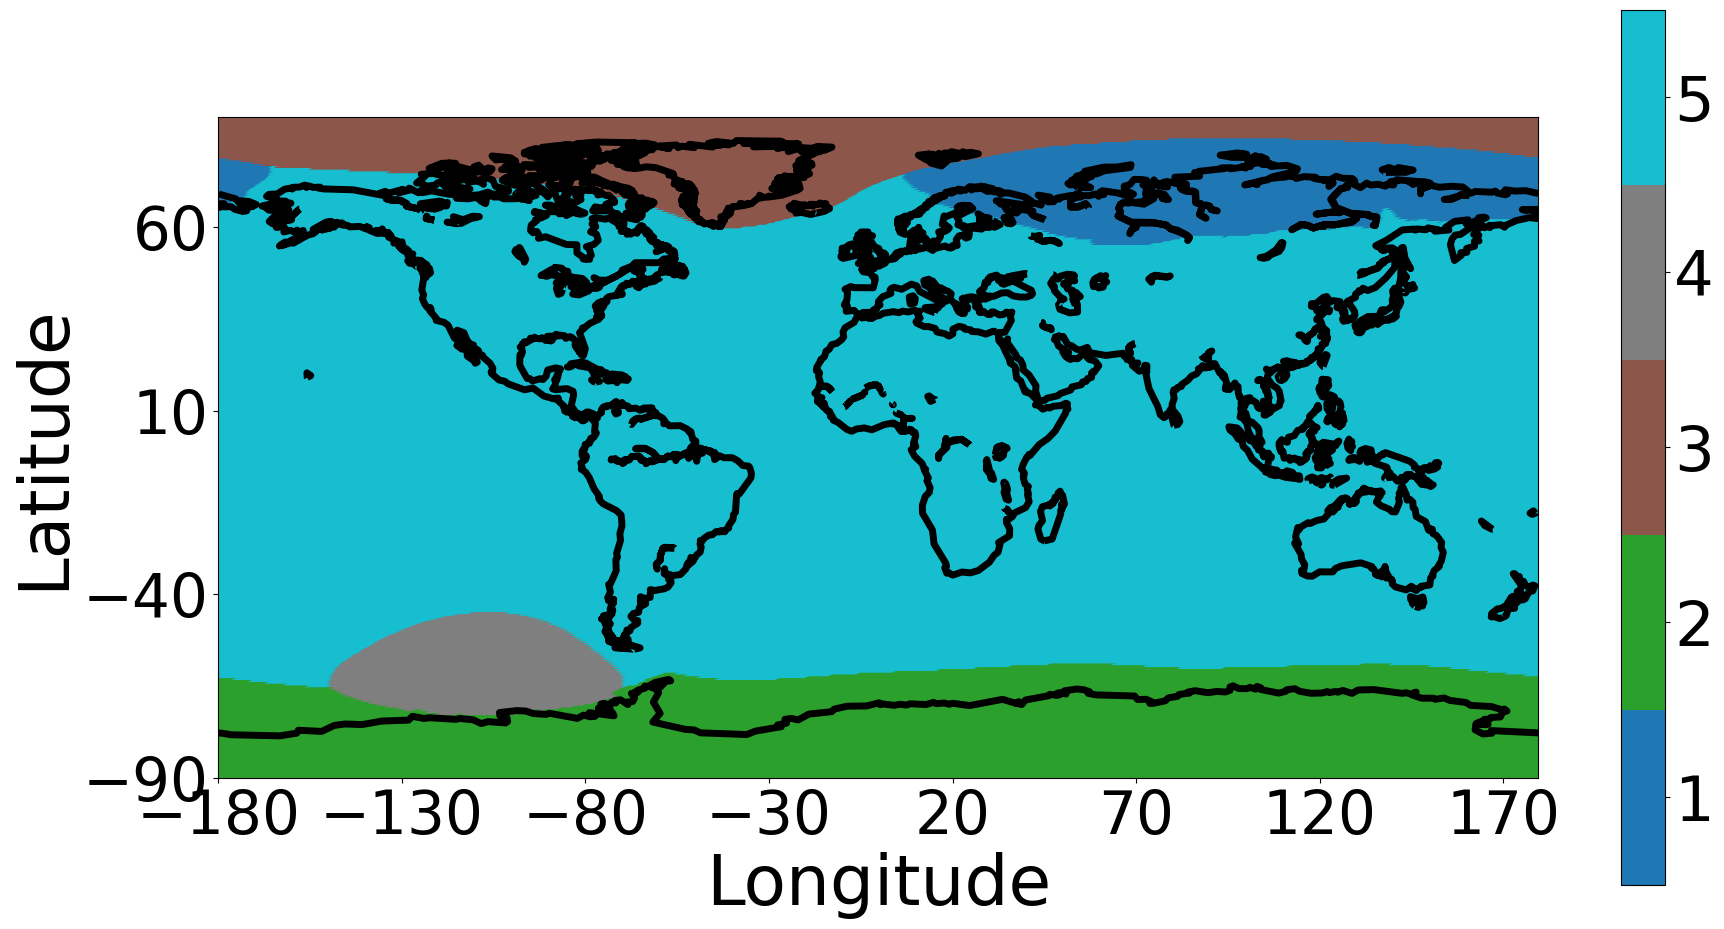

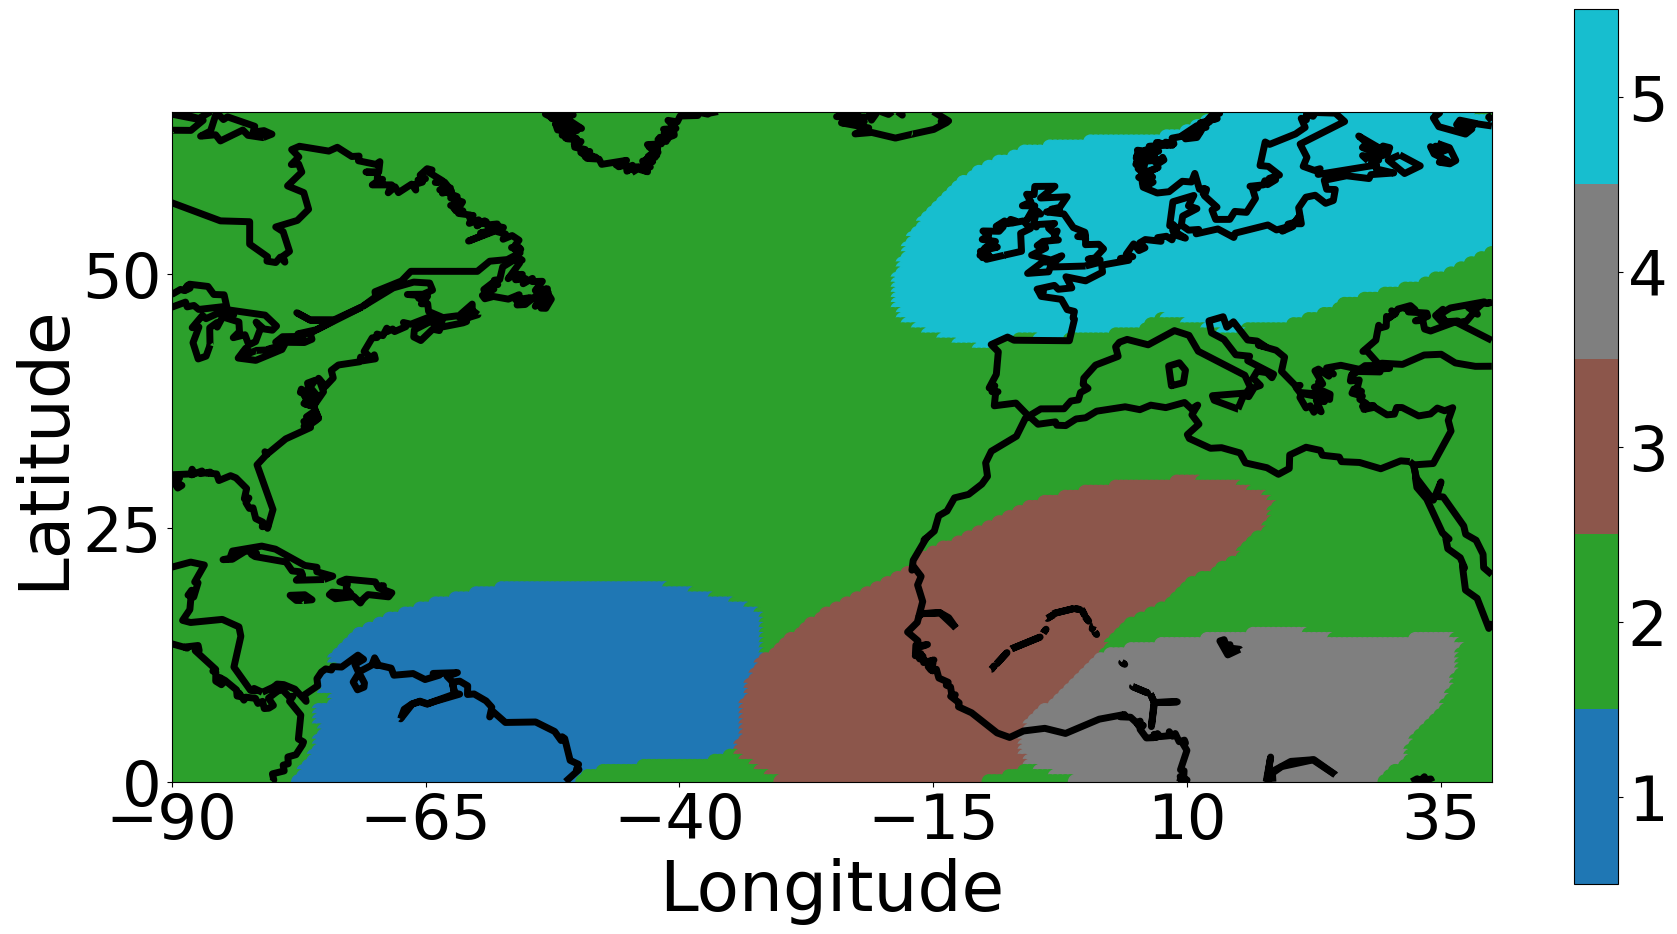

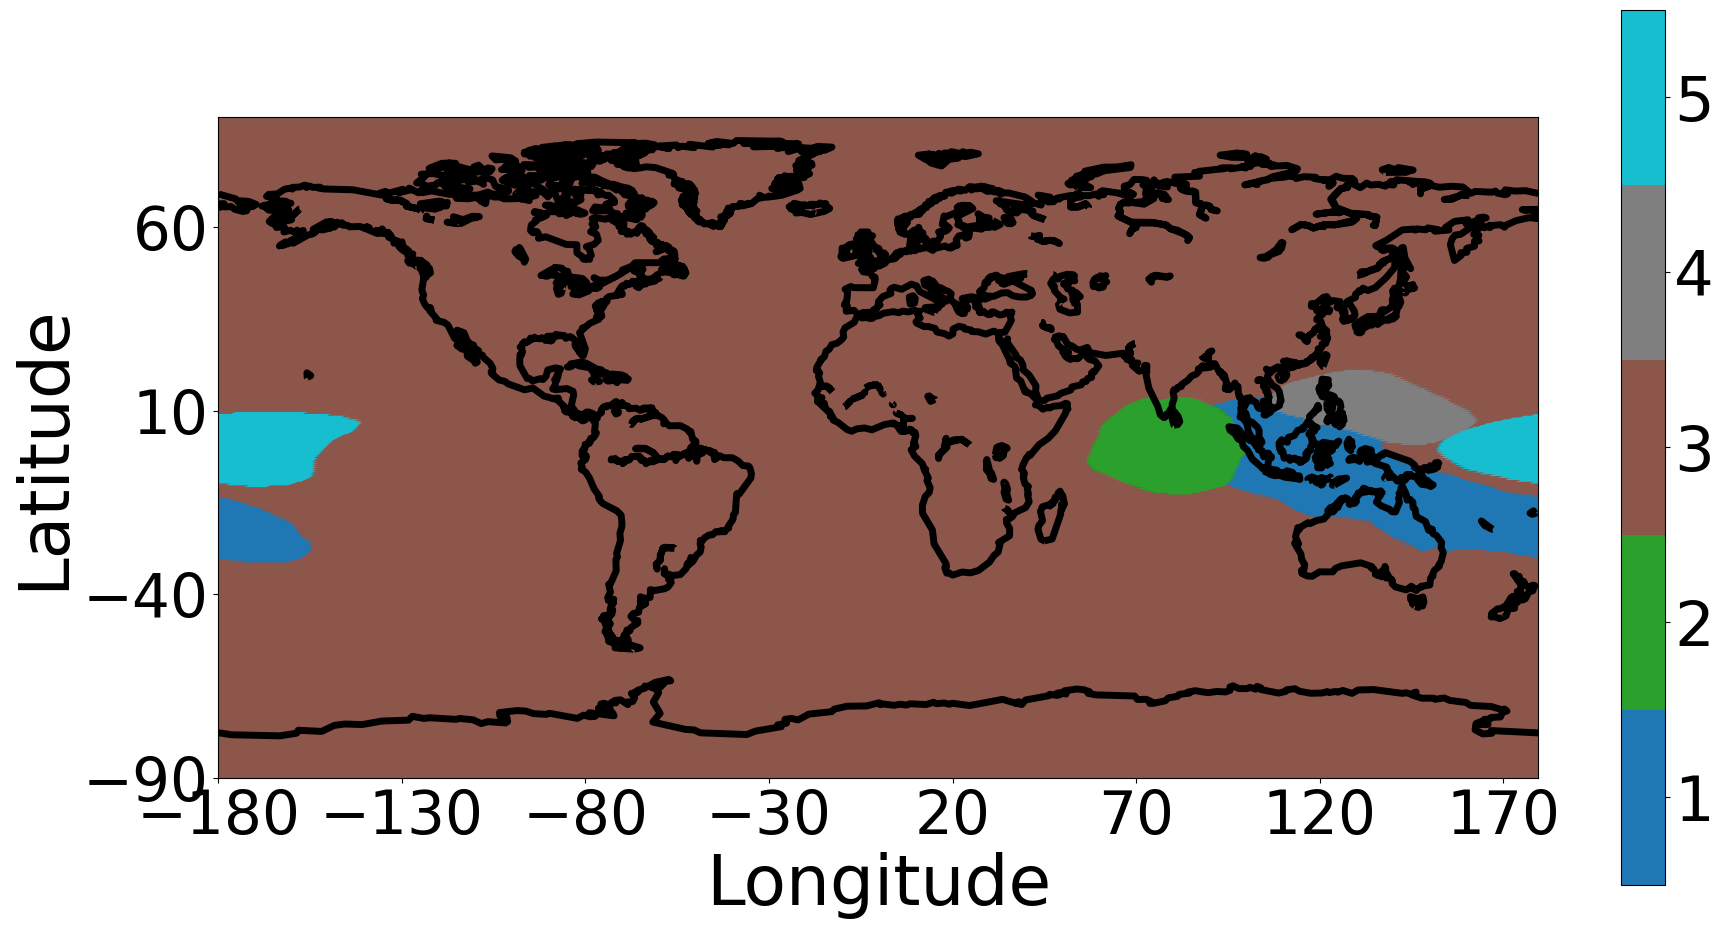

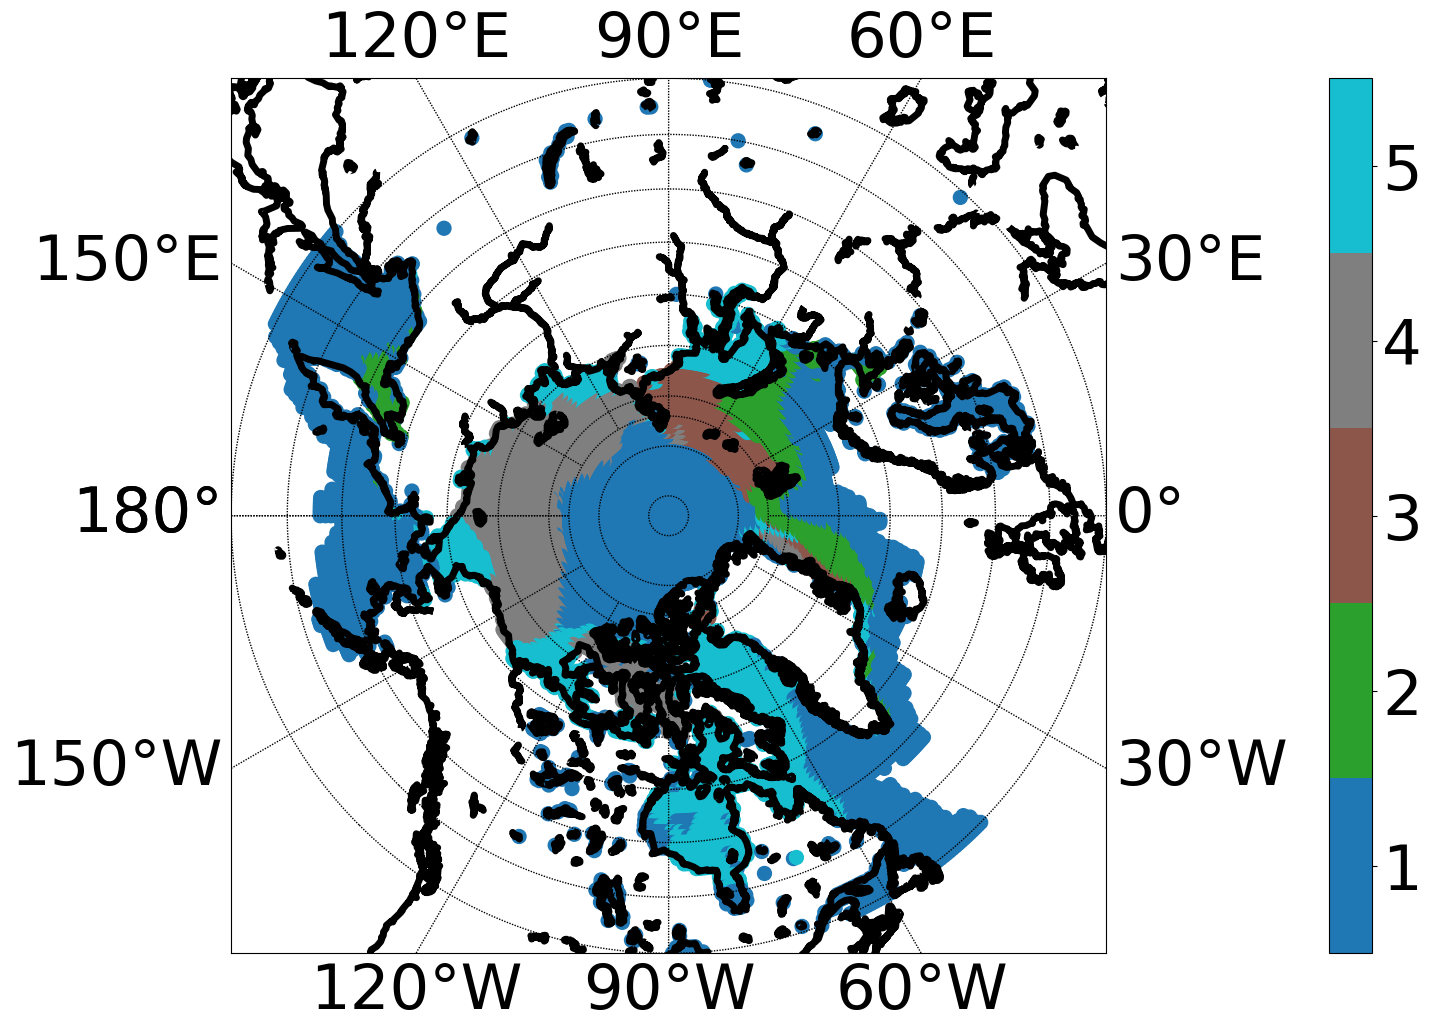

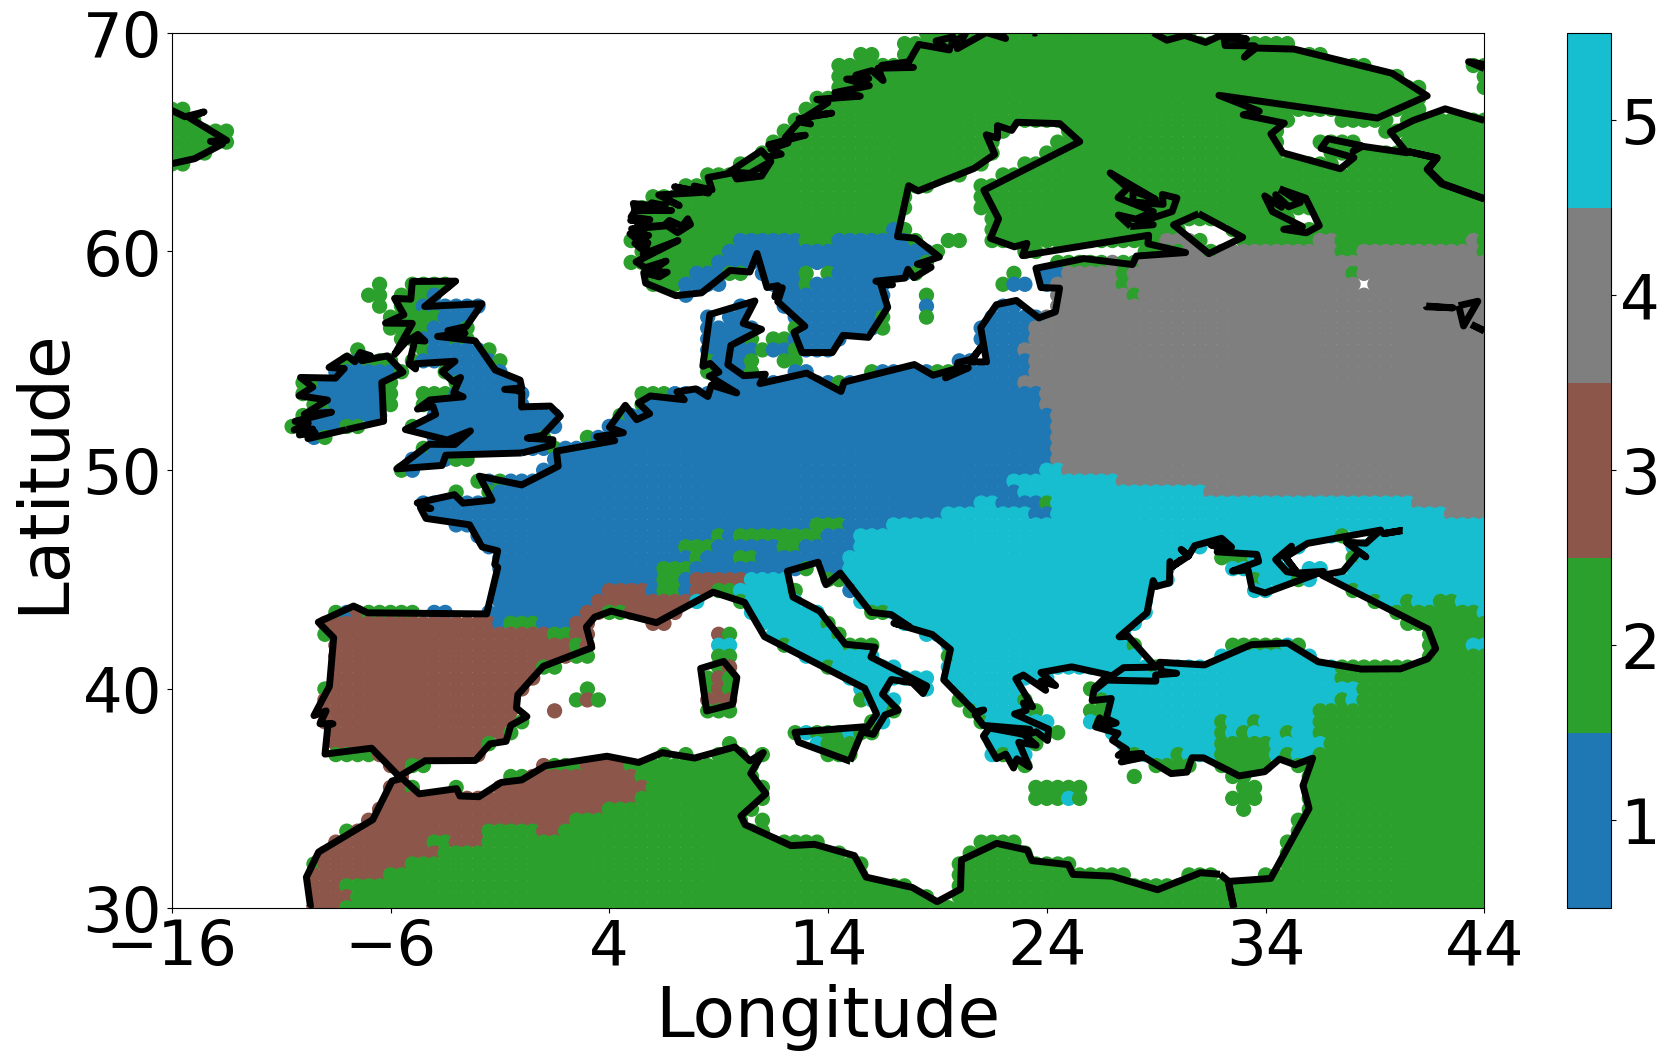

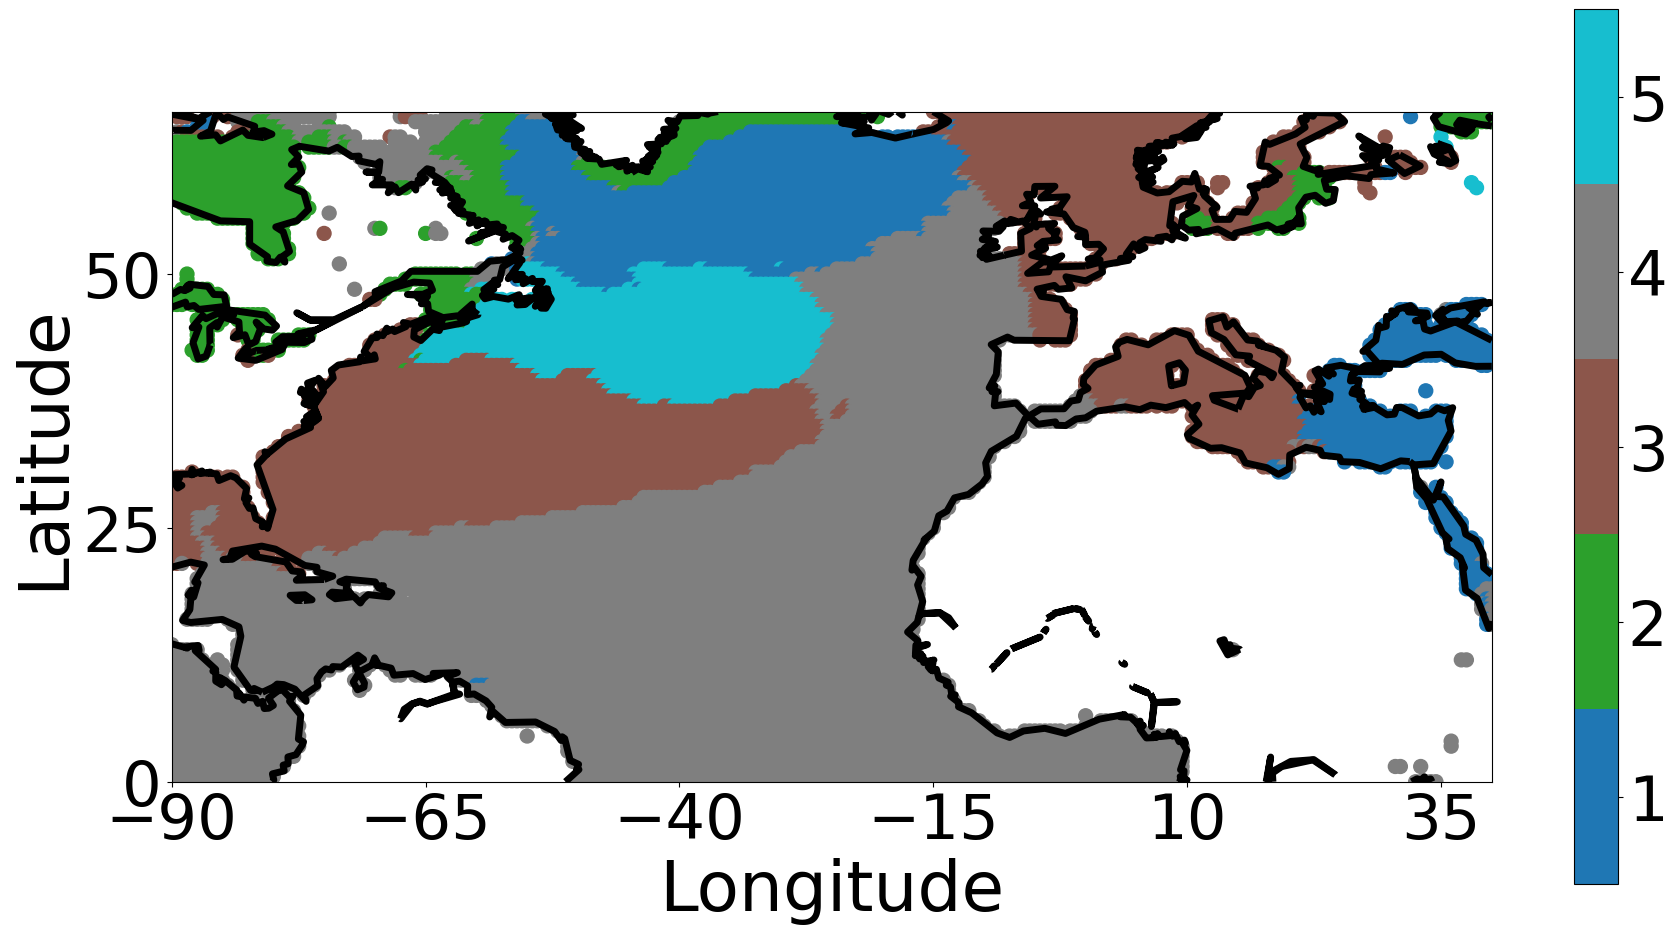

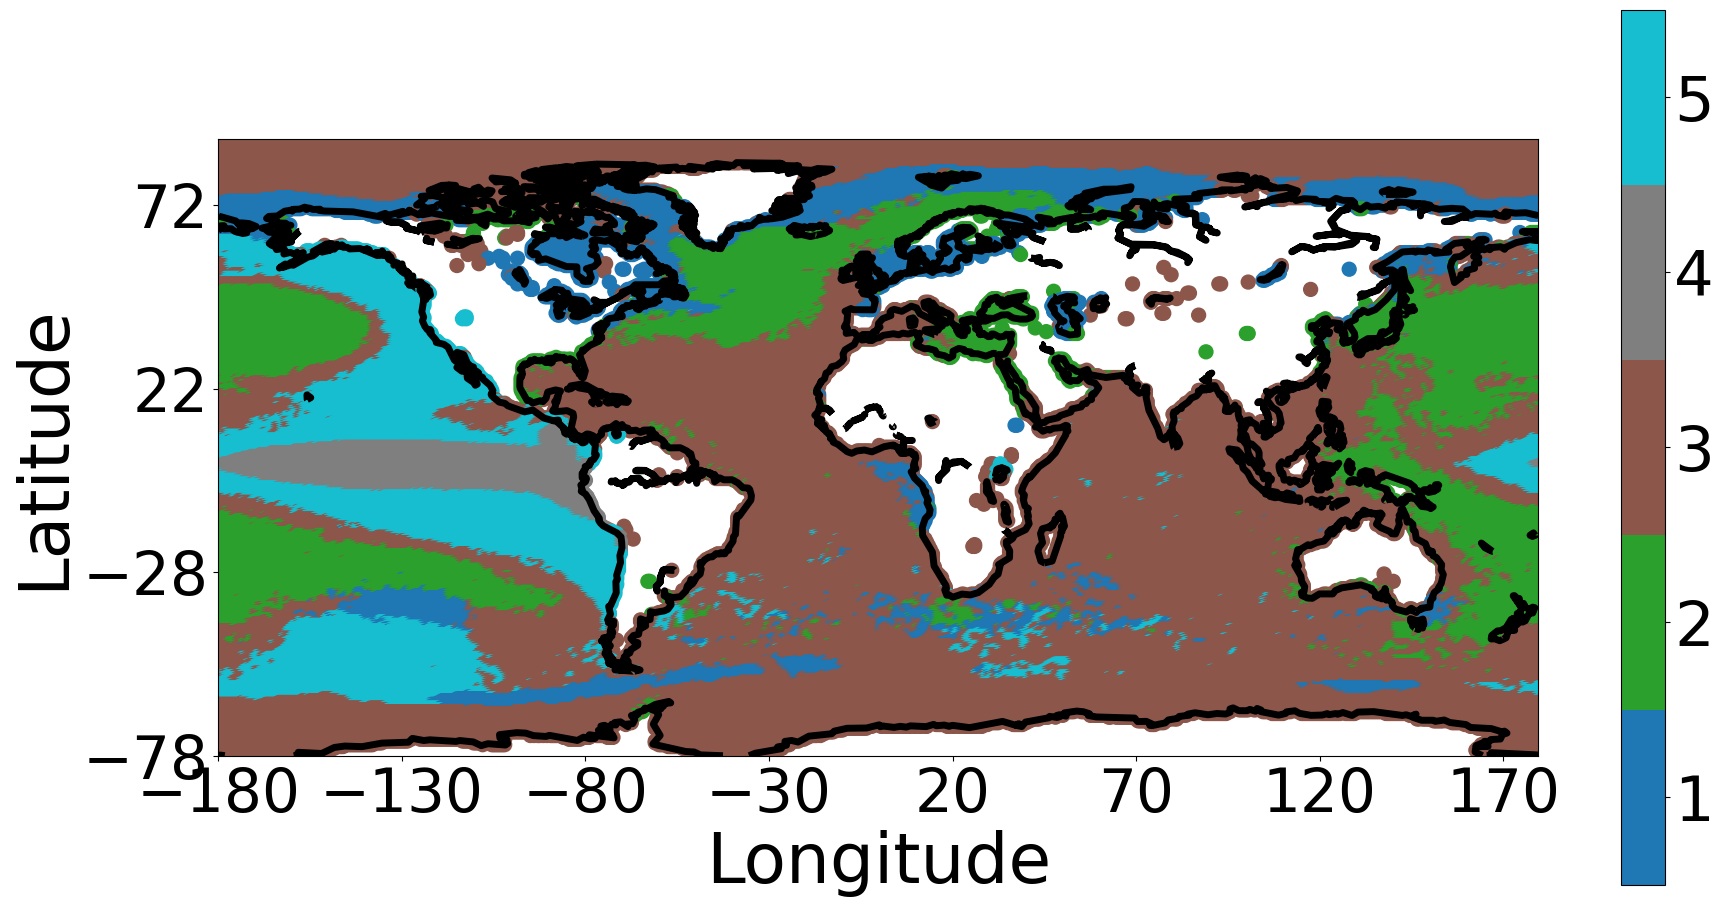

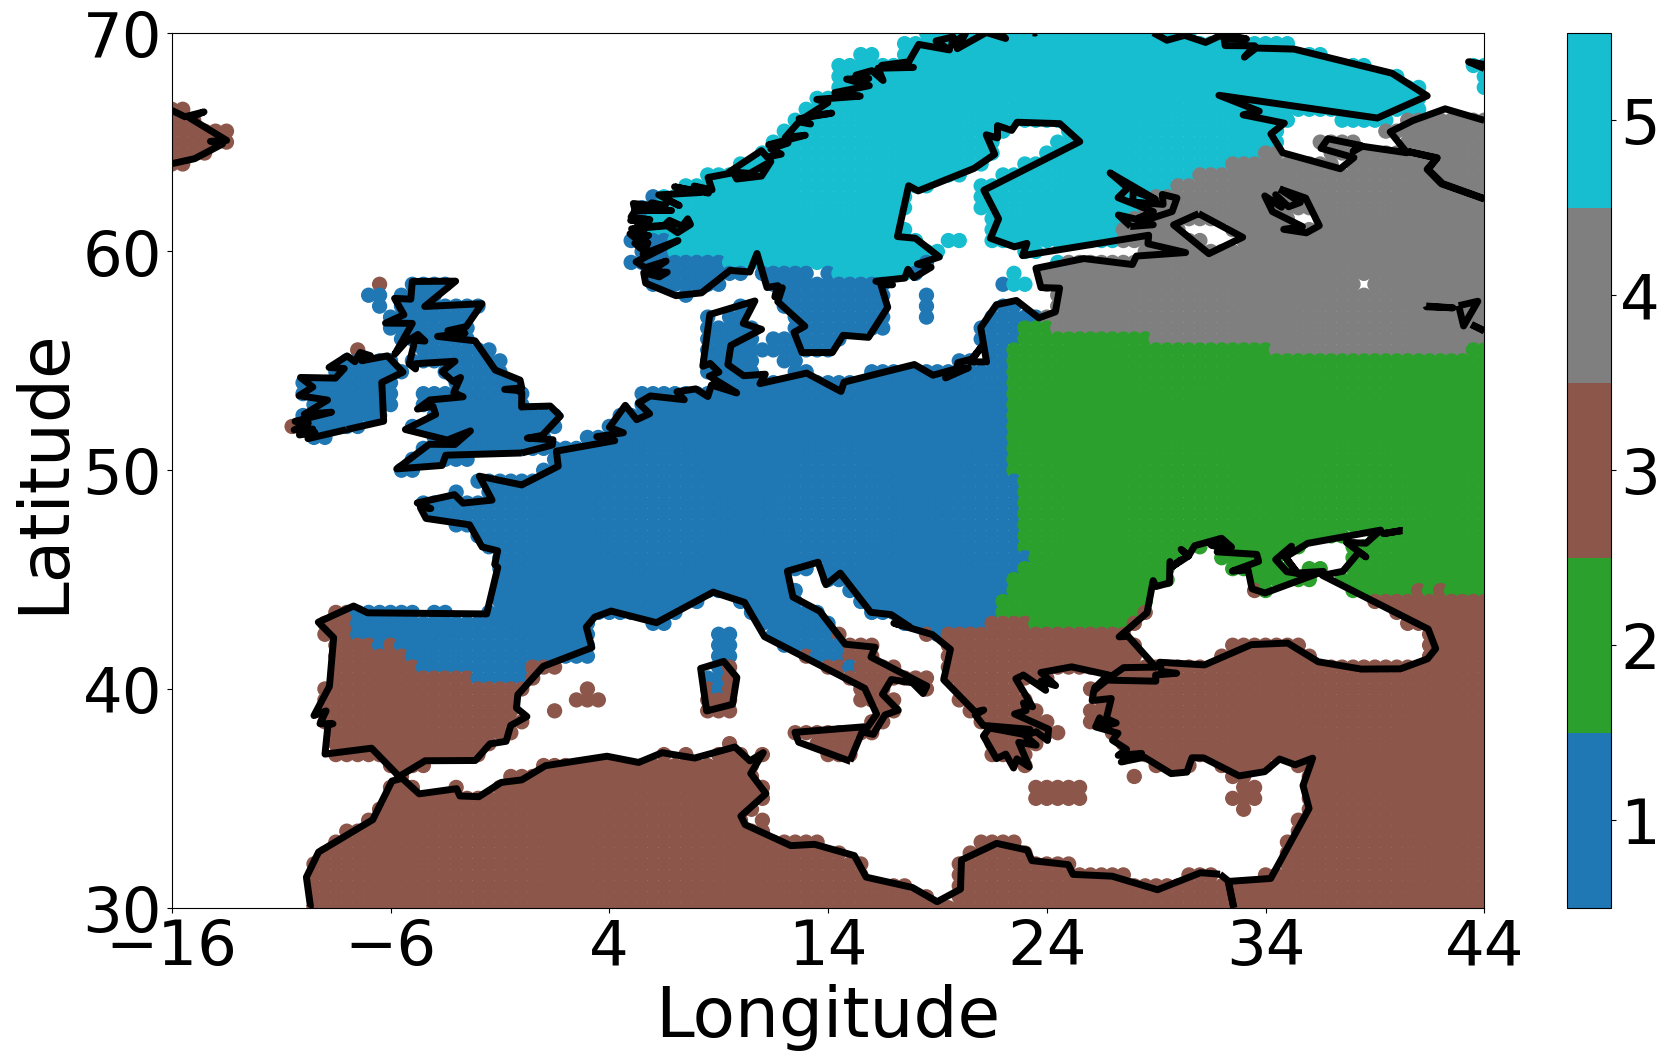

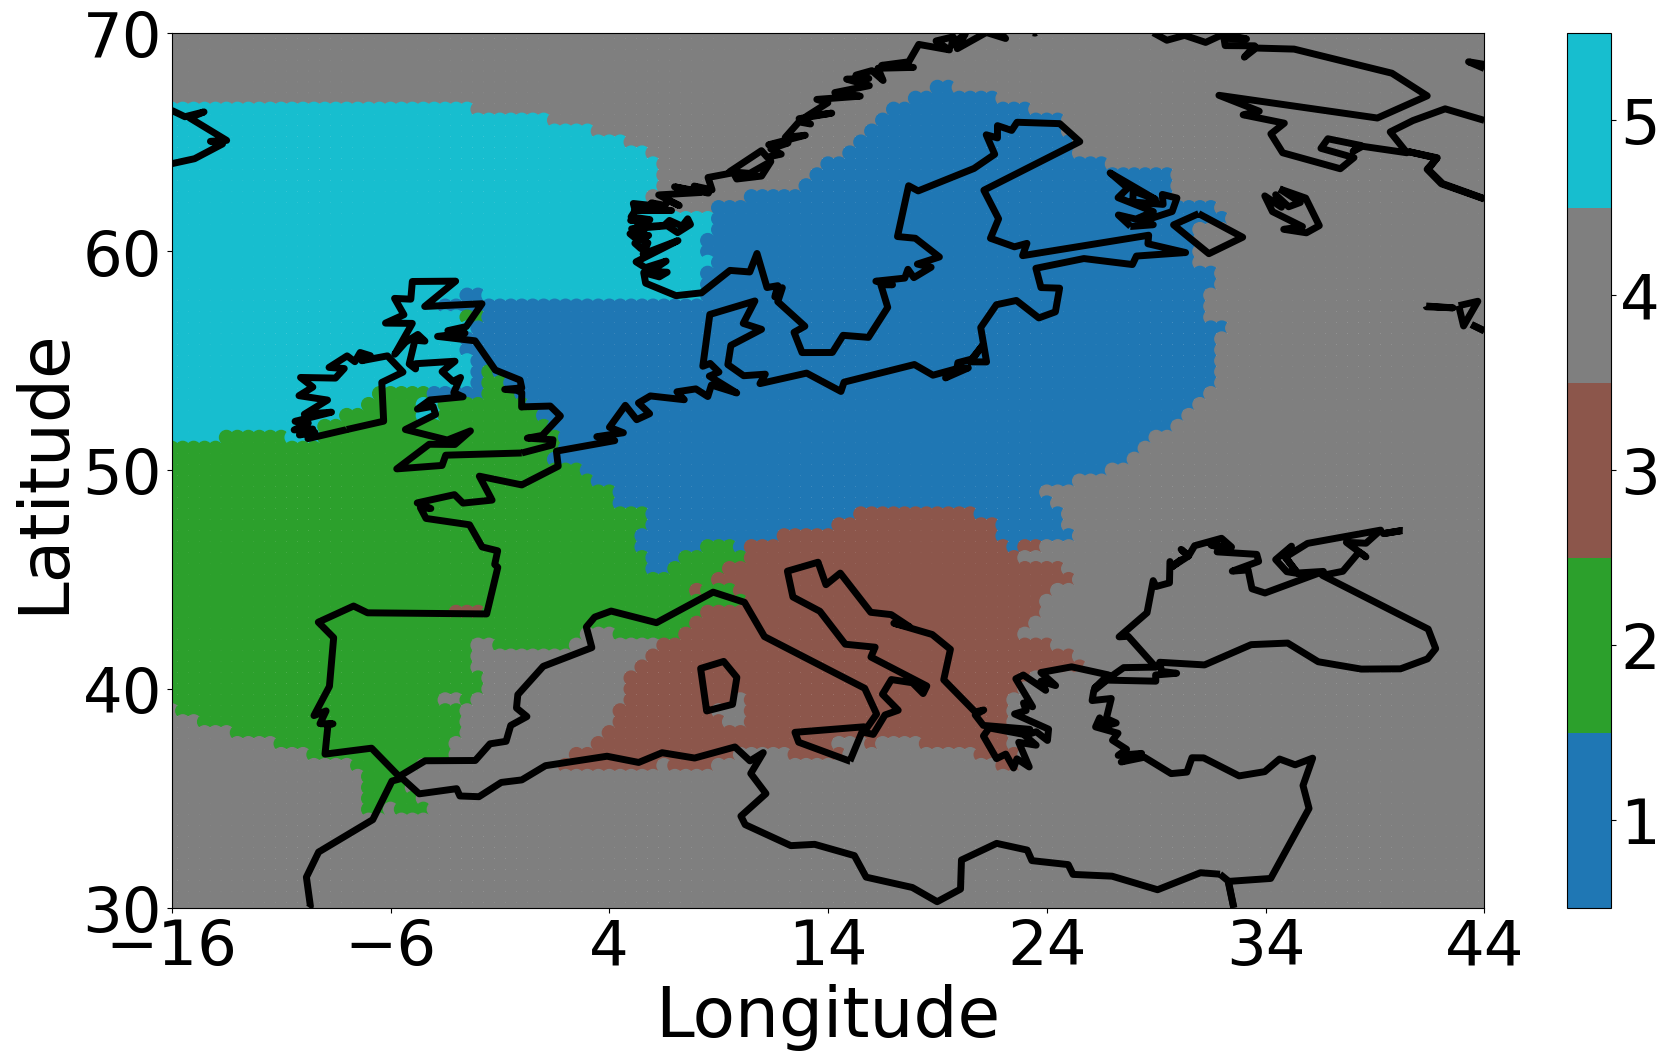

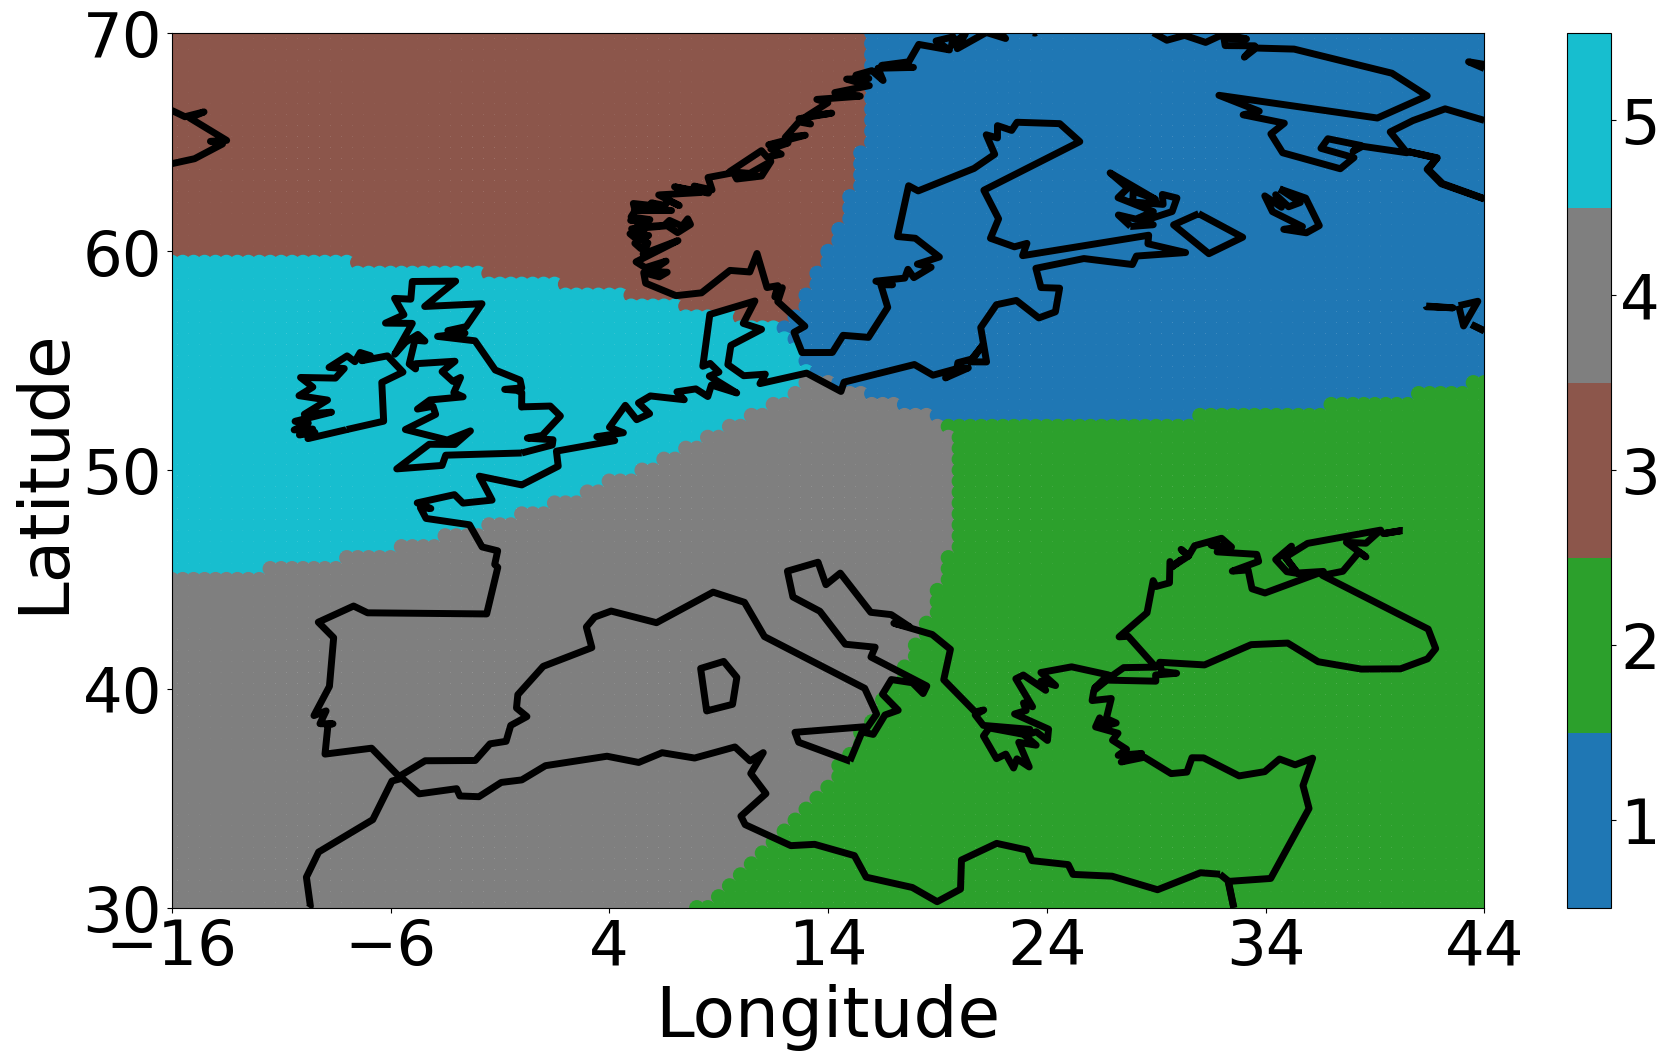

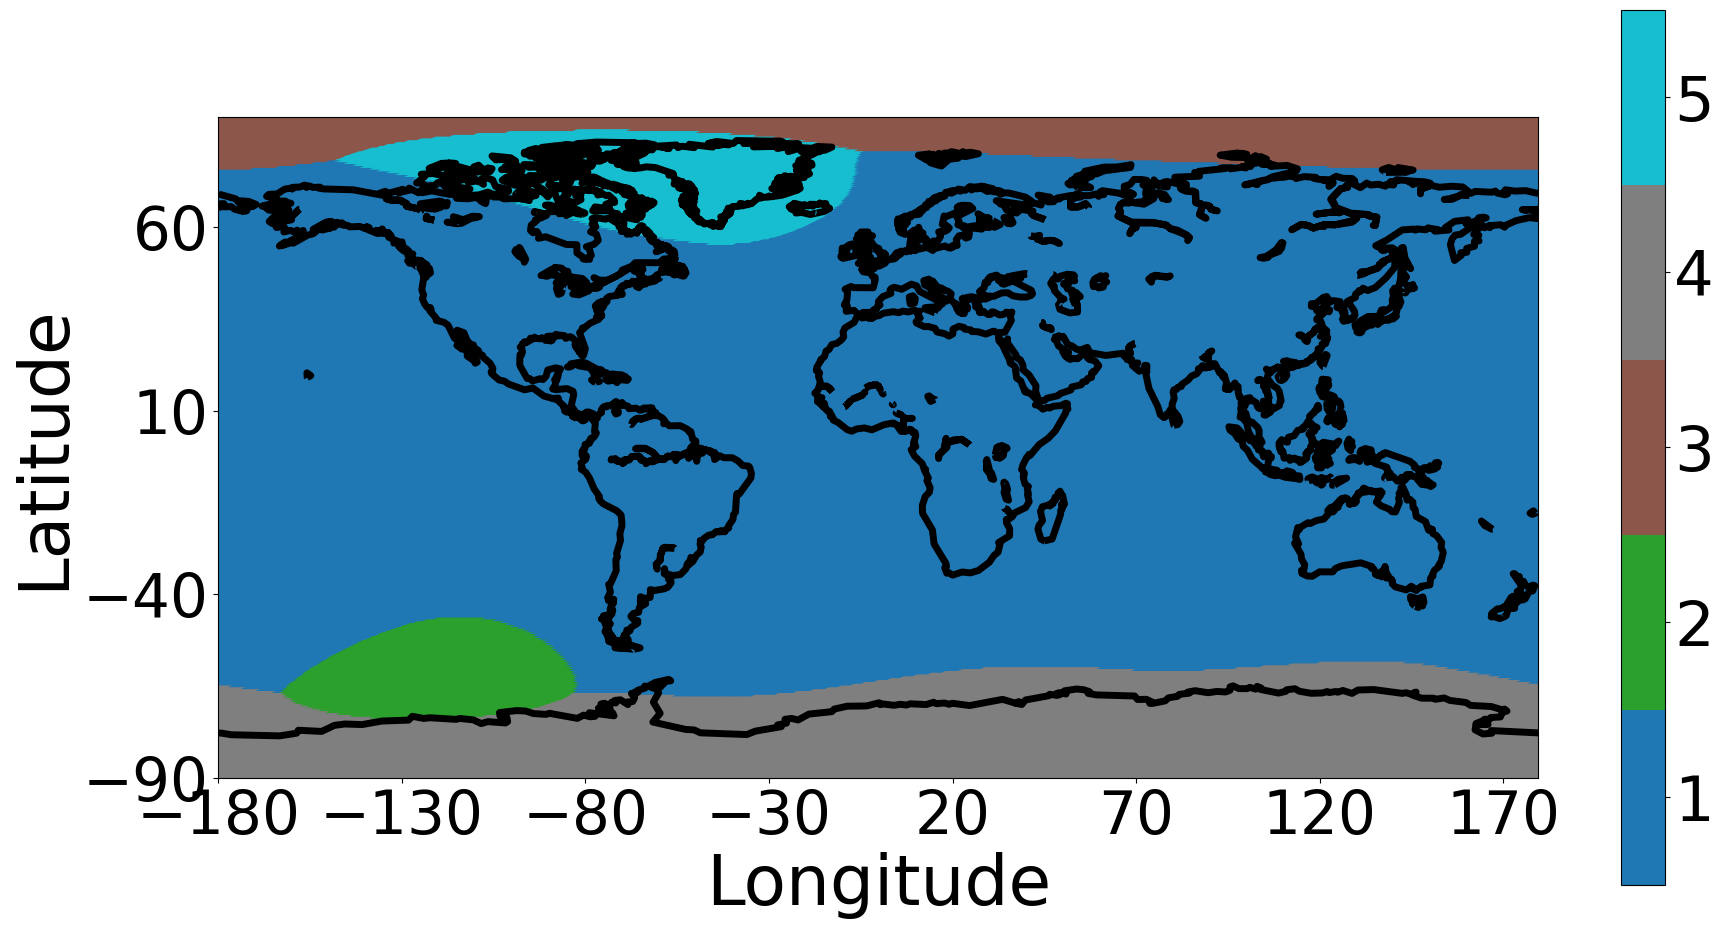

In [60]:
# Plot clusters

from mpl_toolkits.basemap import Basemap
import scienceplots 
# plt.style.use('science')
# use default settings
# plt.style.use()
h=0
for label_file in files_labels:
    label_df = pd.read_csv(pred_path+label_file,index_col=0)
    h+=1
    fig = plt.figure(figsize=(20, 10))
    fig.subplots_adjust(bottom=0.075, top=0.95, left=0.075, right=0.9, wspace=0.1, hspace=0.05)

    if label_file == 'labelssicArtic5.csv':
        map = Basemap(projection='npstere',boundinglat=48,lon_0=270,resolution='l')
    else:
        map = Basemap(projection='cyl',llcrnrlat=label_df['nodes_lat'].min(),urcrnrlat=label_df['nodes_lat'].max(), llcrnrlon=label_df['nodes_lon'].min(),urcrnrlon=label_df['nodes_lon'].max(),resolution='c')


    x, y = map(label_df['nodes_lon'],label_df['nodes_lat'])


    num_clusters = label_df['cluster'].max()
    if num_clusters>10:
        cmap = plt.cm.get_cmap('tab20', num_clusters)
    else:
        cmap = plt.cm.get_cmap('tab10', num_clusters)
    map.scatter(x, y,c=label_df['cluster'], cmap=cmap, s=100, )
    # Add colorbar
    bounds = np.arange(num_clusters + 1) + 0.5
    cbar = plt.colorbar(ticks=np.arange(num_clusters)+1, boundaries=bounds)
    cbar.set_ticklabels(np.arange(num_clusters)+1)
    cbar.ax.tick_params(labelsize=45)
    # cbar.set_label('Cluster',fontsize=50)
  
    map.drawcoastlines(linewidth=5)
    # map.drawcountries(linewidth=1)
    # Set plot title
    # plt.title(label_file[8:-5],fontsize=25)

    if label_file=='labelssicArtic5.csv':

        # Adjust the position: move it 7% to the right
        cbar_pos = cbar.ax.get_position()
        new_cbar_pos = [cbar_pos.x0 + 0.07, cbar_pos.y0, cbar_pos.width, cbar_pos.height]
        cbar.ax.set_position(new_cbar_pos)

        # plot xticks and yticks for npstere projection
        # map.drawmeridians(np.arange(-180.,181.,20.), labels=[True, True, True, True])
        parallels = np.arange(48., 91., 5.)  # Define your latitude ticks
        meridians = np.arange(-180., 181., 30.)  # Define your longitude ticks

        # Draw parallels and meridians
        map.drawparallels(parallels, labels=[False, False, False, False],)
        map.drawmeridians(meridians, labels=[True, True, True, True],fontsize=45)


    elif (label_df['nodes_lon'].min() == -180) :
        plt.xticks(np.arange(label_df['nodes_lon'].min(), label_df['nodes_lon'].max()+2, 50),fontsize=43)
        plt.yticks(np.arange(label_df['nodes_lat'].min(), label_df['nodes_lat'].max()+2,50),fontsize=43)
        plt.xlabel('Longitude',fontsize=50)
        plt.ylabel('Latitude',fontsize=50)
    elif  (label_df['nodes_lon'].min() == -90):
        plt.xticks(np.arange(label_df['nodes_lon'].min(), label_df['nodes_lon'].max()+2, 25),fontsize=45)
        plt.yticks(np.arange(label_df['nodes_lat'].min(), label_df['nodes_lat'].max()+2,25),fontsize=45)
        plt.xlabel('Longitude',fontsize=50)
        plt.ylabel('Latitude',fontsize=50)
    else:
        plt.xticks(np.arange(label_df['nodes_lon'].min(), label_df['nodes_lon'].max()+2, 10),fontsize=45)
        plt.yticks(np.arange(label_df['nodes_lat'].max(), label_df['nodes_lat'].min()-2,-10),fontsize=45)
        plt.xlabel('Longitude',fontsize=50)
        plt.ylabel('Latitude',fontsize=50)

    # Show the plot
    plt.savefig(path_figures+experiment+'_'+label_file[:-4]+'.eps', format='eps', dpi=50, bbox_inches='tight')
    plt.savefig(path_figures+experiment+'_'+label_file[:-4]+'.png', format='png', dpi=250, bbox_inches='tight')
    plt.show()

In [61]:
# Read the results files

files = os.listdir(path+experiment)
files = [file for file in files if file.endswith('.csv')]
# files = files[1:]
files

['Test_Paper_1.csv',
 'Test_Paper_10.csv',
 'Test_Paper_2.csv',
 'Test_Paper_3.csv',
 'Test_Paper_4.csv',
 'Test_Paper_5.csv',
 'Test_Paper_6.csv',
 'Test_Paper_7.csv',
 'Test_Paper_8.csv',
 'Test_Paper_9.csv']

In [62]:
# Check the length of the files

sol_file_av = pd.DataFrame(columns=['CV','Test','Sol'])
for file in files:
    ff = pd.read_csv(path+experiment+'/'+file,sep=' ',header=0)
    # ff = pd.read_csv('./Results/Test3_CRO/'+file,sep=' ',header=0)[:20000]
    print(len(ff))
    sol_file_av = pd.concat([sol_file_av,ff])
sol_file_av.reset_index(inplace=True,drop=True)
# sol_file_av.drop_duplicates(subset=['Sol'],inplace=True)
sol_file_av.shape


15064
15010
15022
15061
15072
15077
15064
15010
15021
15047


(150448, 3)

Text(0, 0.5, 'Test')

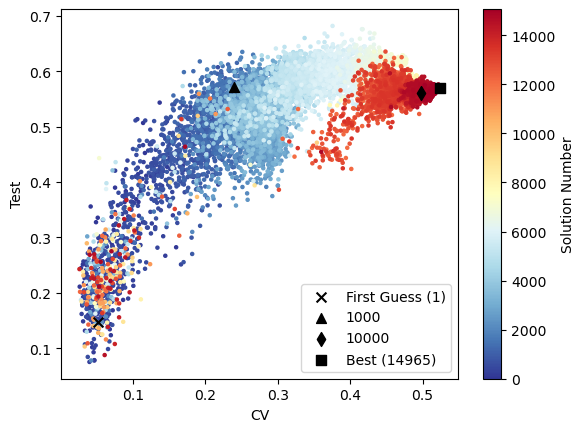

In [63]:
# Plot the evolution of one solution

# Colors #
sol_file = sol_file_av[0:15064]
num_sims_org=len(sol_file)
top_point = sol_file.sort_values(by=['CV'],ascending=False).index[0]
plt.scatter(sol_file['CV'],sol_file['Test'],c=range(num_sims_org),s=5,alpha=1,cmap='RdYlBu_r')
plt.colorbar(label="Solution Number")
# Show specific solutions #
plt.scatter(sol_file.CV[0],sol_file.Test[0],color='black',marker='x',s=50,label="First Guess (1)")
plt.scatter(sol_file.CV[1000],sol_file.Test[1000],color='black',marker='^',s=50,label="1000")
plt.scatter(sol_file.CV[10000],sol_file.Test[10000],color='black',marker='d',s=50,label="10000")
plt.scatter(sol_file.CV[sol_file.sort_values(by=['CV'],ascending=False).index[0]],sol_file.Test[sol_file.sort_values(by=['CV'],ascending=False).index[0]],color='black',marker='s',s=50,label="Best ({})".format(top_point))
plt.legend()
plt.xlabel('CV')
plt.ylabel('Test')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


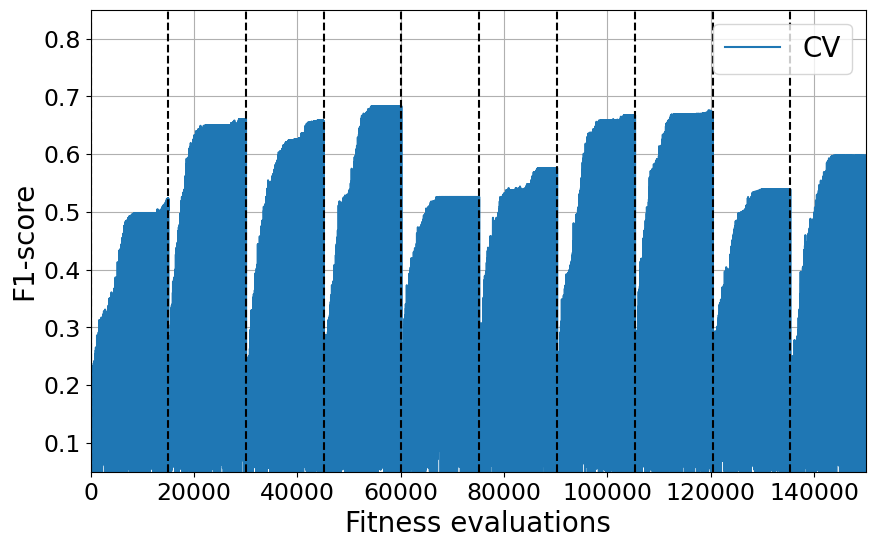

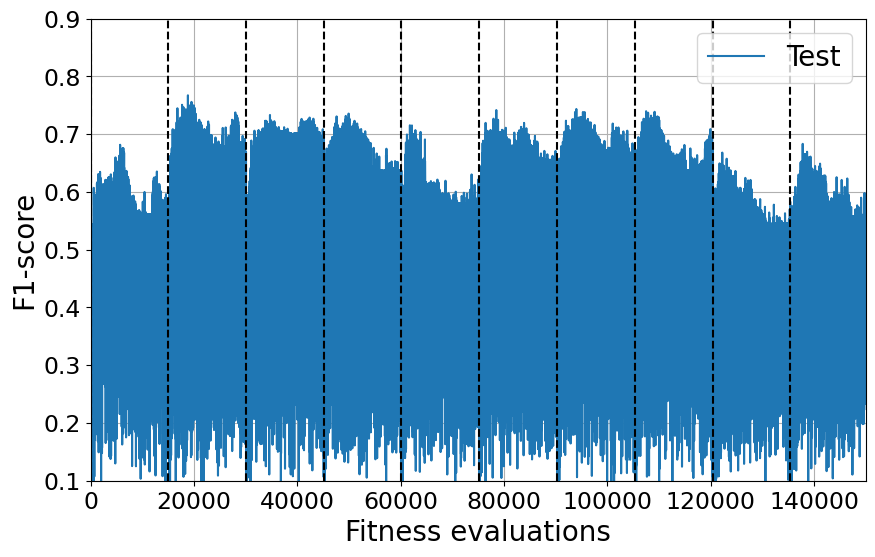

In [64]:
# Plot evolution of each solution in CV and Test

plt.figure(figsize=(10, 6))
plt.plot(sol_file_av.index,sol_file_av['CV'],label='CV')
# plt.plot(sol_file_av.index,sol_file_av['Test'],label='Test')
# plt.axhline(y = sol_file_av.sort_values(by=['CV'],ascending=False).head(int(0.1*sol_file_av.shape[0]))['CV'].values[-1], color = 'r', linestyle = '-')
xline_pos = 0
plt.axvline(x=xline_pos, color = 'k', linestyle = '--')
for file in files:
    ff = pd.read_csv(path+experiment+'/'+file,sep=' ',header=0)
    xline_pos+=len(ff)
    plt.axvline(x=xline_pos, color = 'k', linestyle = '--')
plt.ylim([0.05,0.85])
plt.xlim([0,150000])
plt.grid()
plt.xlabel('Fitness evaluations',fontsize=20)
plt.ylabel('F1-score',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize = 20,loc = 'upper right')
plt.savefig(path_figures+'CV_Low.eps', format='eps', dpi=1000, bbox_inches = 'tight')

plt.figure(figsize=(10, 6))
# plt.plot(sol_file_av.index,sol_file_av['CV'],label='CV')
plt.plot(sol_file_av.index,sol_file_av['Test'],label='Test')
# plt.axhline(y = sol_file_av.sort_values(by=['CV'],ascending=False).head(int(0.1*sol_file_av.shape[0]))['CV'].values[-1], color = 'r', linestyle = '-')
xline_pos = 0
plt.axvline(x=xline_pos, color = 'k', linestyle = '--')
for file in files:
    ff = pd.read_csv(path+experiment+'/'+file,sep=' ',header=0)
    xline_pos+=len(ff)
    plt.axvline(x=xline_pos, color = 'k', linestyle = '--')
plt.ylim([0.1,0.9])
plt.xlim([0,150000])
plt.grid()
plt.xlabel('Fitness evaluations',fontsize=20)
plt.ylabel('F1-score',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize = 20,loc=1)
plt.savefig(path_figures+'Test_Low.eps', format='eps', dpi=1000, bbox_inches = 'tight')


In [65]:
# Drop duplicates
sol_file_av.drop_duplicates(subset=['Sol'],inplace=True)
sol_file_av.shape

(92207, 3)

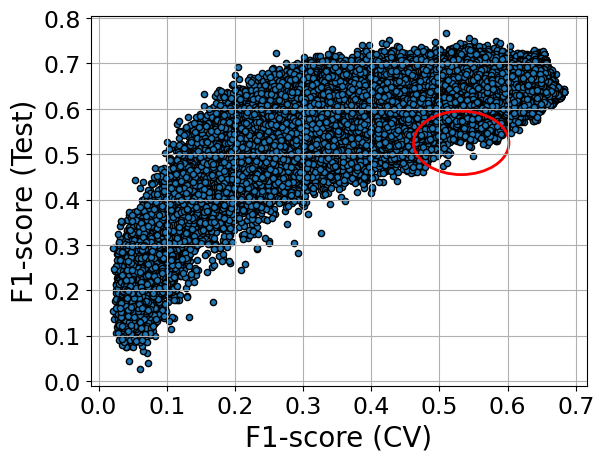

In [66]:
# Plot the scatter plot	of all the solutions

plt.scatter(sol_file_av['CV'],sol_file_av['Test'], s=20, edgecolors="k")
# sns.scatterplot(data=sol_file_av, x="CV", y="Test")
# plt.scatter(sol_file_av['CV'],sol_file_av['Test'], color='c')

z = np.polyfit(sol_file_av['CV'], sol_file_av['Test'], 1)
p = np.poly1d(z)
#add trendline to plot
# plt.plot(sol_file_av['CV'], p(sol_file_av['CV']), "r-", linewidth=2.0,)
plt.xlabel('F1-score (CV)',fontsize=20)
plt.ylabel('F1-score (Test)',fontsize=20)
plt.grid()
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Add red circle to select the best 10%
# circle = plt.Circle((0.76, 0.805), 0.04, color='red', fill=False, linewidth=2.0)  # MAx Temp
circle = plt.Circle((0.532, 0.525), 0.07, color='red', fill=False, linewidth=2.0)  #HW

plt.gca().add_artist(circle)

# print(p)
# plt.title('y=0.56x+0.42',fontsize=18)
# plt.savefig(path_figures+'Scatter_low_HW_noT2m.png', format='png', dpi=250, bbox_inches = 'tight')

In [67]:
# Select best solution

array_best = np.fromstring(sol_file_av.Sol[sol_file_av.sort_values(by=['CV'],ascending=False).index[0]].replace('[', '').replace(']', '').replace('\n', ''), dtype=float, sep=' ')

array_best

array([  6.,  20.,  31.,  56.,  34.,   9.,  16.,  15.,  18.,   7.,  17.,
        35.,   3.,  25.,  18.,  24.,  51.,   9.,   2.,  10.,  10.,  19.,
        36.,   8.,  23.,  21.,  10.,  19.,  12.,  25.,  41.,  10.,   8.,
        52.,  39.,  30.,  23.,  52.,  47.,  20.,  22.,  23.,   8.,  15.,
        37.,   9.,  19.,  39.,  44.,   7.,   1.,  27.,  21.,   1.,  47.,
        35.,  39.,  10.,  19.,  21.,  11.,   2.,  30.,  38.,  46.,  39.,
        24.,  24.,  46.,  56.,  51., 125.,  45.,  22.,  30.,  24.,  49.,
         2.,  36.,  18.,   8., 156.,  52.,   4.,  40.,  91.,  22.,  39.,
        94.,  13.,  21.,  28.,  42.,  28.,  74.,  39.,  33.,  43.,   0.,
        31.,  58.,  30.,  19.,  22.,  69.,  44.,  17.,   7.,  46.,  51.,
        19.,   0.,  19.,  11.,  52.,  71.,  13., 151.,   1.,  38.,  10.,
        22.,  26.,  48.,  47.,  38.,  31.,  11.,  93.,   9.,  21.,  26.,
        67.,  60.,   0.,  23.,   0.,  42.,  12.,  12.,  23.,  24.,   1.,
         0.,   1.,   0.,   0.,   1.,   0.,   1.,   

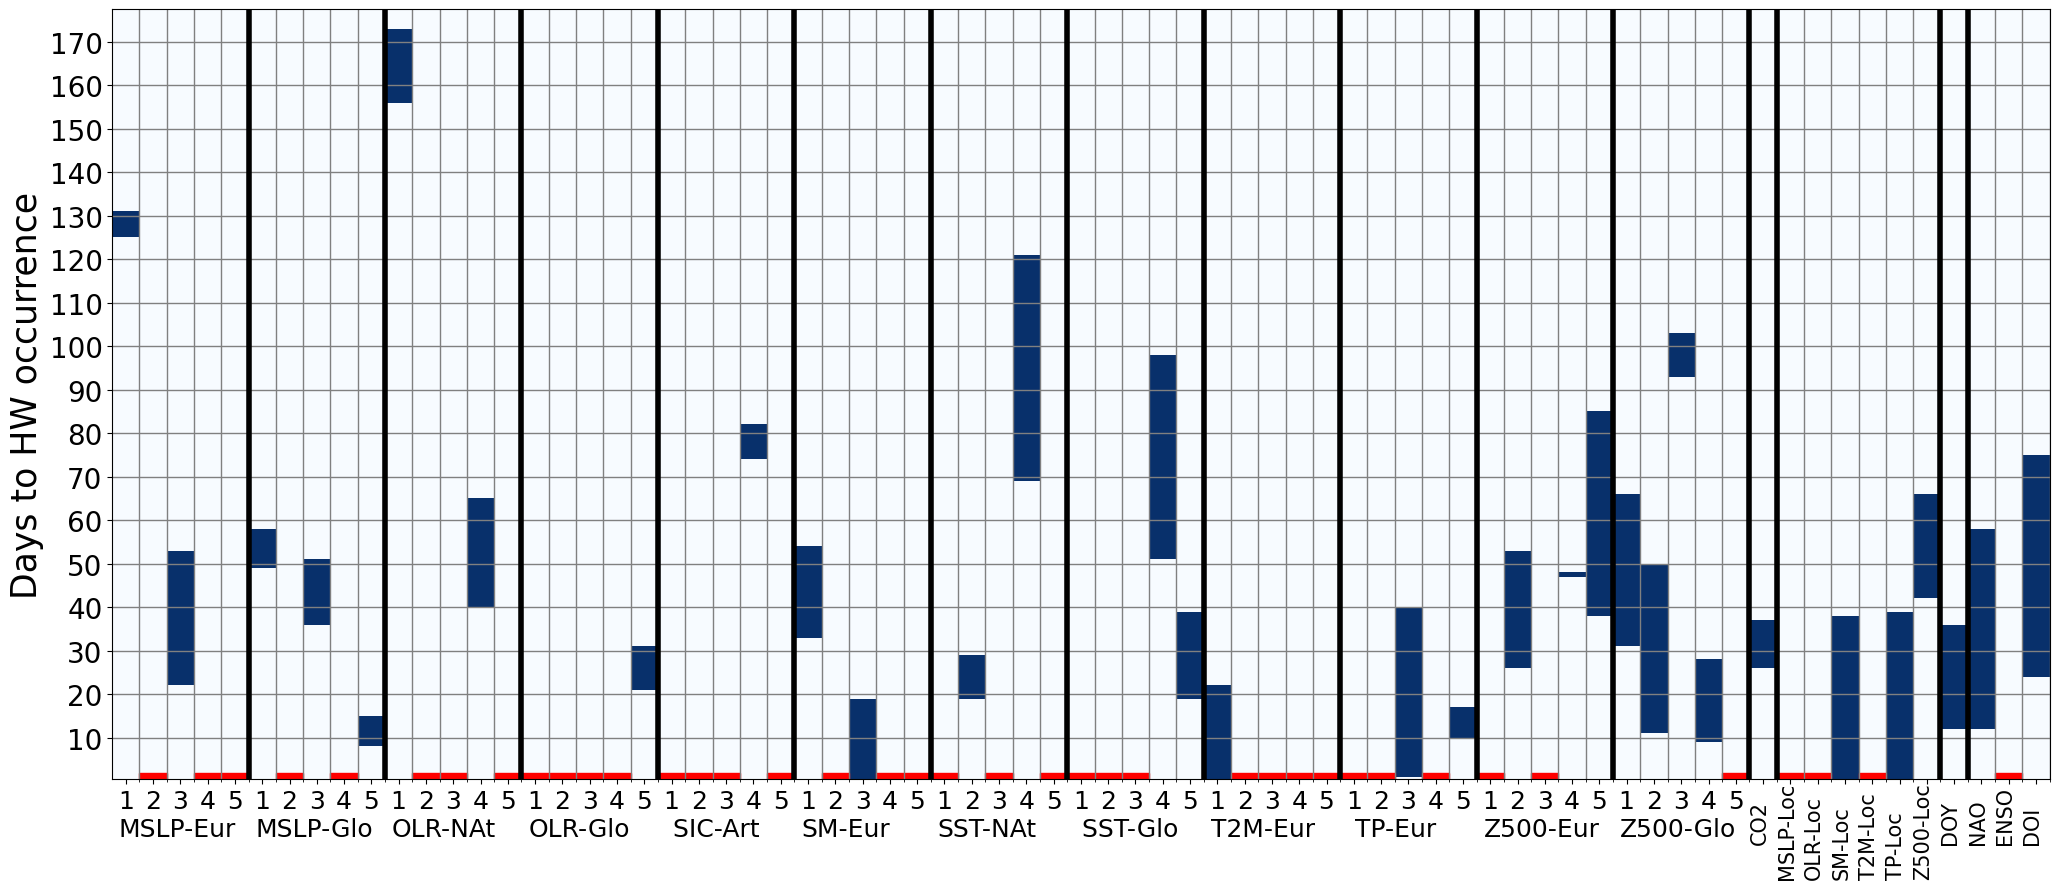

In [68]:
# Plot the best solution

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator,MultipleLocator

def create_board(n_rows, n_cols, final_sequence, sequence_length):
    board = np.zeros((n_rows, n_cols))
    
    # Establecer los cuadrados azules
    for i in range(n_cols):
        start_index = int(final_sequence[i]) 
        end_index = int(final_sequence[i])  + int(sequence_length[i])
        if feat_sel[i] != 0:
            board[start_index:end_index, i] = 1
    
    return board

def plot_board(board, column_names):
    plt.figure(figsize=(25, 10))
    plt.imshow(board, cmap='Blues', origin='lower',aspect='auto')
    plt.xticks(np.arange(len(column_names)), column_names, rotation=90,fontsize=15)
    minor_locator = AutoMinorLocator(2)

    plt.gca().yaxis.set_major_locator(MultipleLocator(10))

    plt.yticks(fontsize=20)

    # Put the yticks labels

    # plt.gca().xaxis.grid( which='major',linewidth=1)
    # plt.gca().yaxis.grid(which='major',color='black', linewidth=1)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    plt.gca().xaxis.grid(which='minor', color='black', linewidth=1)
    plt.gca().yaxis.grid(which='major', color='black', linewidth=1)
    plt.ylabel('Days to target', fontsize=25)

    for i in range(board.shape[1]):
        if feat_sel[i] == 0:
            rect = plt.Rectangle((i - 0.5, -0.5), 1, 2, color='red')
            plt.gca().add_patch(rect)
    plt.ylim(0)

    labels=['1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '','','','','','','','','','','']
    plt.xticks(np.arange(len(column_names)), column_names, rotation=90,fontsize=11)
    # plt.yticks(np.arange(0,board_100.shape[0],1)-0.5,np.arange(0,board_100.shape[0],1))
    # plt.gca().yaxis.set_major_locator(MultipleLocator(5))
    # plt.gca().yaxis.grid(which='major', color='black', linewidth=1)
    plt.ylabel('Days to target', fontsize=25)

    plt.xticks(np.arange(len(column_names)), labels, rotation=0, fontsize=18)
    plt.yticks(np.arange(0,board.shape[0],10) - 0.5, np.int0(np.arange(0,board.shape[0],10)),fontsize=20)
    minor_locator = AutoMinorLocator(2)
    plt.gca().xaxis.set_minor_locator(minor_locator)
    plt.gca().xaxis.grid(which='minor', color='gray', linewidth=1)
    plt.gca().yaxis.grid(which='major', color='gray', linewidth=1)

    # plt.ylabel('Days to target', fontsize=25)
    plt.ylabel('Days to HW occurrence', fontsize=25)

    plt.ylim(-0, np.nonzero(board.sum(axis=1))[0][-1]+5)

    for i in range(0,12,1):
        plt.axvline(x=4.5+(5*i),color='black',lw='4')
    plt.axvline(x=60.5,color='black',lw='4')
    plt.axvline(x=66.5,color='black',lw='4')
    plt.axvline(x=67.5,color='black',lw='4')

    for i in range(len(['MSLP-Eur','MSLP-Glo','OLR-NAt','OLR-Glo',' SIC-Art','SM-Eur','SST-NAt',' SST-Glo','T2M-Eur',' TP-Eur','Z500-Eur','Z500-Glo',
                        ])):
        plt.text(((i)*5)-0.25,-13,"{}".format(['MSLP-Eur','MSLP-Glo','OLR-NAt','OLR-Glo',' SIC-Art','SM-Eur','SST-NAt',' SST-Glo','T2M-Eur',' TP-Eur','Z500-Eur','Z500-Glo',
                        ][i]),fontsize=18)
        
    # Put the xticks labels below the plot
    # 
    # 
    # plt.text(0.5,-2.5,"{}".format('mslEur'),fontsize=18)    
    plt.text(59.5,-14,"{}".format('CO2'),rotation=90,fontsize=15)
    # plt.text(61.5,-2.5,"{}".format('Local'),fontsize=18)

    plt.text(60.5,-22,"{}".format('MSLP-Loc'),rotation=90,fontsize=15)
    plt.text(61.5,-22,"{}".format('OLR-Loc'),rotation=90,fontsize=15)
    plt.text(62.5,-22,"{}".format('SM-Loc'),rotation=90,fontsize=15)
    plt.text(63.5,-22,"{}".format('T2M-Loc'),rotation=90,fontsize=15)
    plt.text(64.5,-22,"{}".format('TP-Loc'),rotation=90,fontsize=15)
    plt.text(65.5,-22,"{}".format('Z500-Loc'),rotation=90,fontsize=15)
    plt.text(66.5,-14,"{}".format('DOY'),rotation=90,fontsize=15)
    plt.text(67.5,-14,"{}".format('NAO'),rotation=90,fontsize=15)
    plt.text(68.5,-14,"{}".format('ENSO'),rotation=90,fontsize=15)
    plt.text(69.5,-14,"{}".format('DOI'),rotation=90,fontsize=15)



    plt.savefig(path_figures+'Heatmap_low_100_best_HW.eps', format='eps', bbox_inches = 'tight')
    plt.show()

column_names = pred_dataframe_opt.columns.tolist()
final_sequence = array_best[len(column_names):2*len(column_names)]
sequence_length = array_best[:len(column_names)]
feat_sel = array_best[2*len(column_names):]


n_rows = int(((sequence_length + final_sequence)*feat_sel).max())+5
n_cols = len(column_names)

board_best = create_board(n_rows, n_cols, final_sequence, sequence_length)

plot_board(board_best, column_names)

In [69]:
# Select best 10% of the solutions
best100_index = sol_file_av.sort_values(by=['CV'],ascending=False).head(int(0.1*sol_file_av.shape[0])).index

arrays = []
for ind in best100_index:
    array = np.fromstring(sol_file_av.Sol[ind].replace('[', '').replace(']', '').replace('\n', ''), dtype=float, sep=' ')
    arrays.append(array)

 
0.5628 x + 0.3406


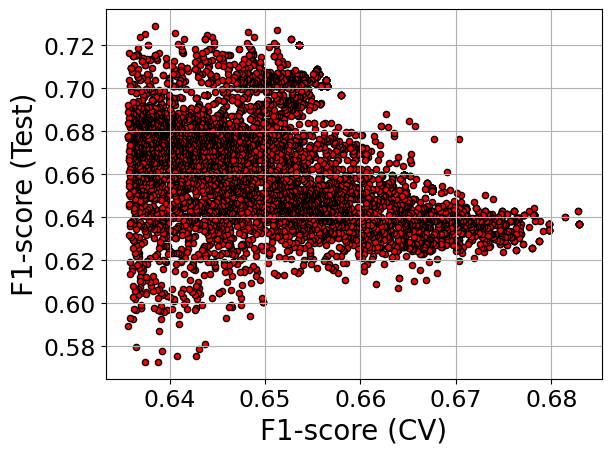

In [31]:
# Scatter plot of the best 10% of the solutions

# plt.scatter(sol_file_av['CV'],sol_file_av['Test'], s=20, edgecolors="k")
# plt.scatter(sol_file_av[sol_file_av['CV']<0.7363921109057479]['CV'],sol_file_av[sol_file_av['CV']<0.7363921109057479]['Test'], s=20, edgecolors="k")
z = np.polyfit(sol_file_av['CV'], sol_file_av['Test'], 1)
p = np.poly1d(z)
# plt.scatter(sol_file_av.CV[sol_file_av.sort_values(by=['CV'],ascending=False).index[0]],sol_file_av.Test[sol_file_av.sort_values(by=['CV'],ascending=False).index[0]],color='black',marker='x',s=200,linewidths=3)
plt.scatter(sol_file_av.CV[best100_index],sol_file_av.Test[best100_index],color='red', s=20, edgecolors="k")
#add trendline to plot
# plt.plot(sol_file_av['CV'], p(sol_file_av['CV']), "r-", linewidth=2.0,)
plt.xlabel('CV')
plt.ylabel('Test')
plt.grid()
print(p)
plt.xlabel('F1-score (CV)',fontsize=20)
plt.ylabel('F1-score (Test)',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
# plt.title('y=0.56x+0.42',fontsize=18)
plt.savefig(path_figures+'Scatter_low_Best_HW_not2m.png', format='png', dpi=250, bbox_inches = 'tight')



In [71]:
# Prepare the board for the best 10% of the solutions

n_rows = int(((sequence_length + final_sequence)*feat_sel).max())+5
n_cols = len(column_names)

board_100 = np.zeros((n_rows, n_cols))
discarded = np.zeros((1, n_cols))

for array in arrays:
    final_sequence = array[len(column_names):2*len(column_names)]
    sequence_length = array[:len(column_names)]
    feat_sel = array[2*len(column_names):]
    column_names = pred_dataframe_opt.columns.tolist()

    for i in range(n_cols):
        start_index = int(final_sequence[i])
        end_index = int(final_sequence[i]) + int(sequence_length[i])
        

        if feat_sel[i]==0:
            discarded[0,i] += 1
        else:
            board_100[start_index:end_index, i] += 1
    
board_100[0,:].shape

normalized_board = board_100*100/int(0.1*sol_file_av.shape[0])
normalized_board.max()

100.0

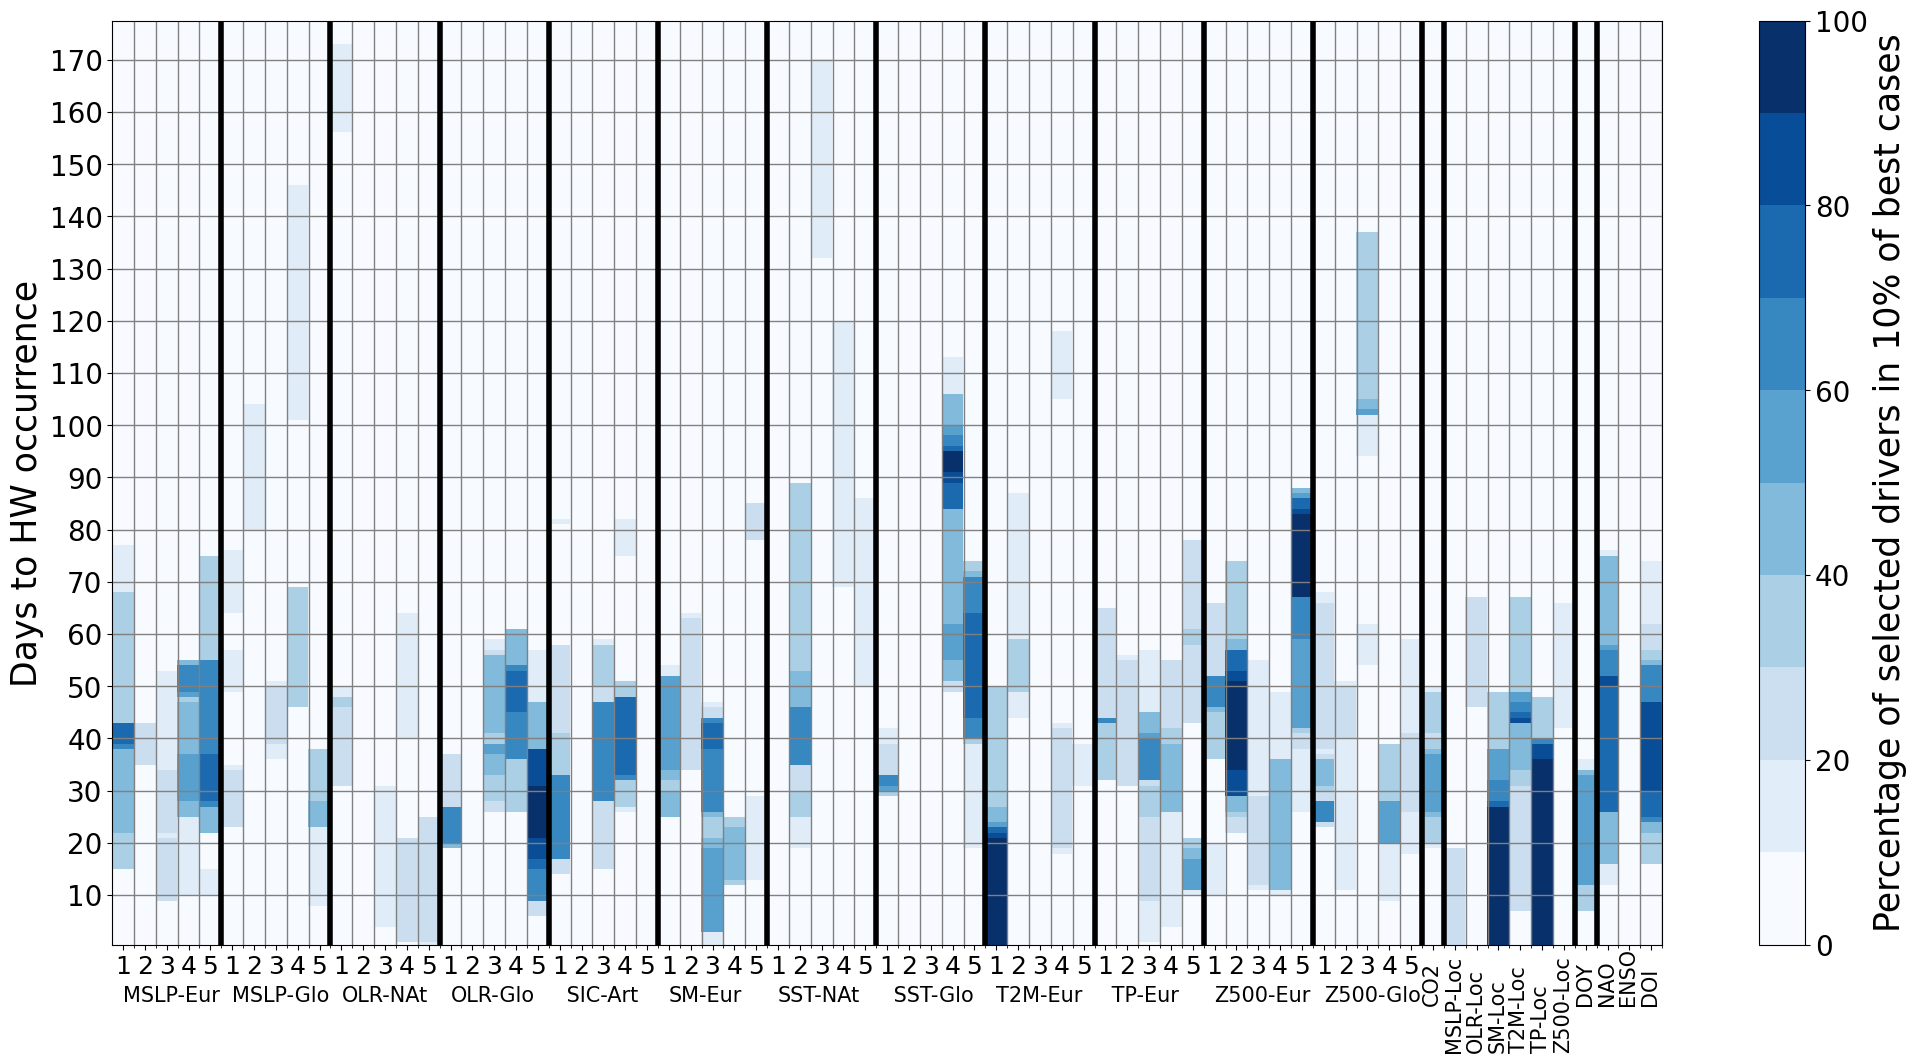

In [76]:
# Plot the heatmap of the best 10% of the solutions (Adjust position of x labels depending on the number of rows#)

# FULL BOARD ###
import matplotlib
plt.figure(figsize=(25, 12))
#board_100=np.ma.masked_where(board_100==0,board_100)

vmax=100
levels=np.arange(0,vmax+1,vmax/10)
norm = matplotlib.colors.BoundaryNorm(levels, len(levels)-1)
labels=['1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '1','2','3','4','5',
        '','','','','','','','','','','']

cmap="Blues"

# plt.imshow(100*board_100/1066, cmap=plt.get_cmap(cmap,len(levels)-1), origin='lower', aspect='auto',vmin=0,vmax=vmax)
plt.imshow(normalized_board, cmap=plt.get_cmap(cmap,len(levels)-1), origin='lower', aspect='auto',vmin=0,vmax=vmax)
plt.xticks(np.arange(len(column_names)), column_names, rotation=90,fontsize=11)
# plt.yticks(np.arange(0,board_100.shape[0],1)-0.5,np.arange(0,board_100.shape[0],1))
# plt.gca().yaxis.set_major_locator(MultipleLocator(5))
# plt.gca().yaxis.grid(which='major', color='black', linewidth=1)
plt.ylabel('Days to target', fontsize=25)

plt.xticks(np.arange(len(column_names)), labels, rotation=0, fontsize=18)
plt.yticks(np.arange(0,board_100.shape[0],10) - 0.5, np.int0(np.arange(0,board_100.shape[0],10)),fontsize=20)
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.gca().xaxis.grid(which='minor', color='gray', linewidth=1)
plt.gca().yaxis.grid(which='major', color='gray', linewidth=1)

# plt.ylabel('Days to target', fontsize=25)
plt.ylabel('Days to HW occurrence', fontsize=25)

plt.ylim(-0, np.nonzero(board_100.sum(axis=1))[0][-1])

for i in range(0,12,1):
    plt.axvline(x=4.5+(5*i),color='black',lw='4')
plt.axvline(x=60.5,color='black',lw='4')
plt.axvline(x=66.5,color='black',lw='4')
plt.axvline(x=67.5,color='black',lw='4')

for i in range(len(['MSLP-Eur','MSLP-Glo','OLR-NAt','OLR-Glo',' SIC-Art','SM-Eur','SST-NAt',' SST-Glo','T2M-Eur',' TP-Eur','Z500-Eur','Z500-Glo',
                        ])):
    plt.text(((i)*5),-11,"{}".format(['MSLP-Eur','MSLP-Glo','OLR-NAt','OLR-Glo',' SIC-Art','SM-Eur','SST-NAt',' SST-Glo','T2M-Eur',' TP-Eur','Z500-Eur','Z500-Glo',
                        ][i]),fontsize=15)
    
# Put the xticks labels below the plot
# 
# 
# plt.text(0.5,-2.5,"{}".format('mslEur'),fontsize=18)    
plt.text(59.5,-11,"{}".format('CO2'),rotation=90,fontsize=15)
# plt.text(61.5,-2.5,"{}".format('Local'),fontsize=18)

plt.text(60.5,-20,"{}".format('MSLP-Loc'),rotation=90,fontsize=15)
plt.text(61.5,-20,"{}".format('OLR-Loc'),rotation=90,fontsize=15)
plt.text(62.5,-20,"{}".format('SM-Loc'),rotation=90,fontsize=15)
plt.text(63.5,-20,"{}".format('T2M-Loc'),rotation=90,fontsize=15)
plt.text(64.5,-20,"{}".format('TP-Loc'),rotation=90,fontsize=15)
plt.text(65.5,-20,"{}".format('Z500-Loc'),rotation=90,fontsize=15)
plt.text(66.5,-11,"{}".format('DOY'),rotation=90,fontsize=15)
plt.text(67.5,-11,"{}".format('NAO'),rotation=90,fontsize=15)
plt.text(68.5,-11,"{}".format('ENSO'),rotation=90,fontsize=15)
plt.text(69.5,-11,"{}".format('DOI'),rotation=90,fontsize=15)

# months=["Apr","Mar","Feb","Jan","Dec","Nov","Oct"]
# 'msl','olr','sm1','t2m','tp','geo','day_of_year','NAO','ENSO','DOI'
# for i,j in enumerate(np.arange(2,board_100.shape[0],4)[:-1]):
#     print (i,j)
#     plt.text(57,(j-1),"{}".format(months[i]),fontsize=20,rotation=45)

# plt.colorbar(label="Percentage of grid points")
#adjust fontsize of colorbar and its title

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Percentage of selected drivers in 10% of best cases',fontsize=25)
plt.savefig(path_figures+'Heatmap_low_100_best_HW.eps', format='eps', bbox_inches = 'tight')

plt.show()

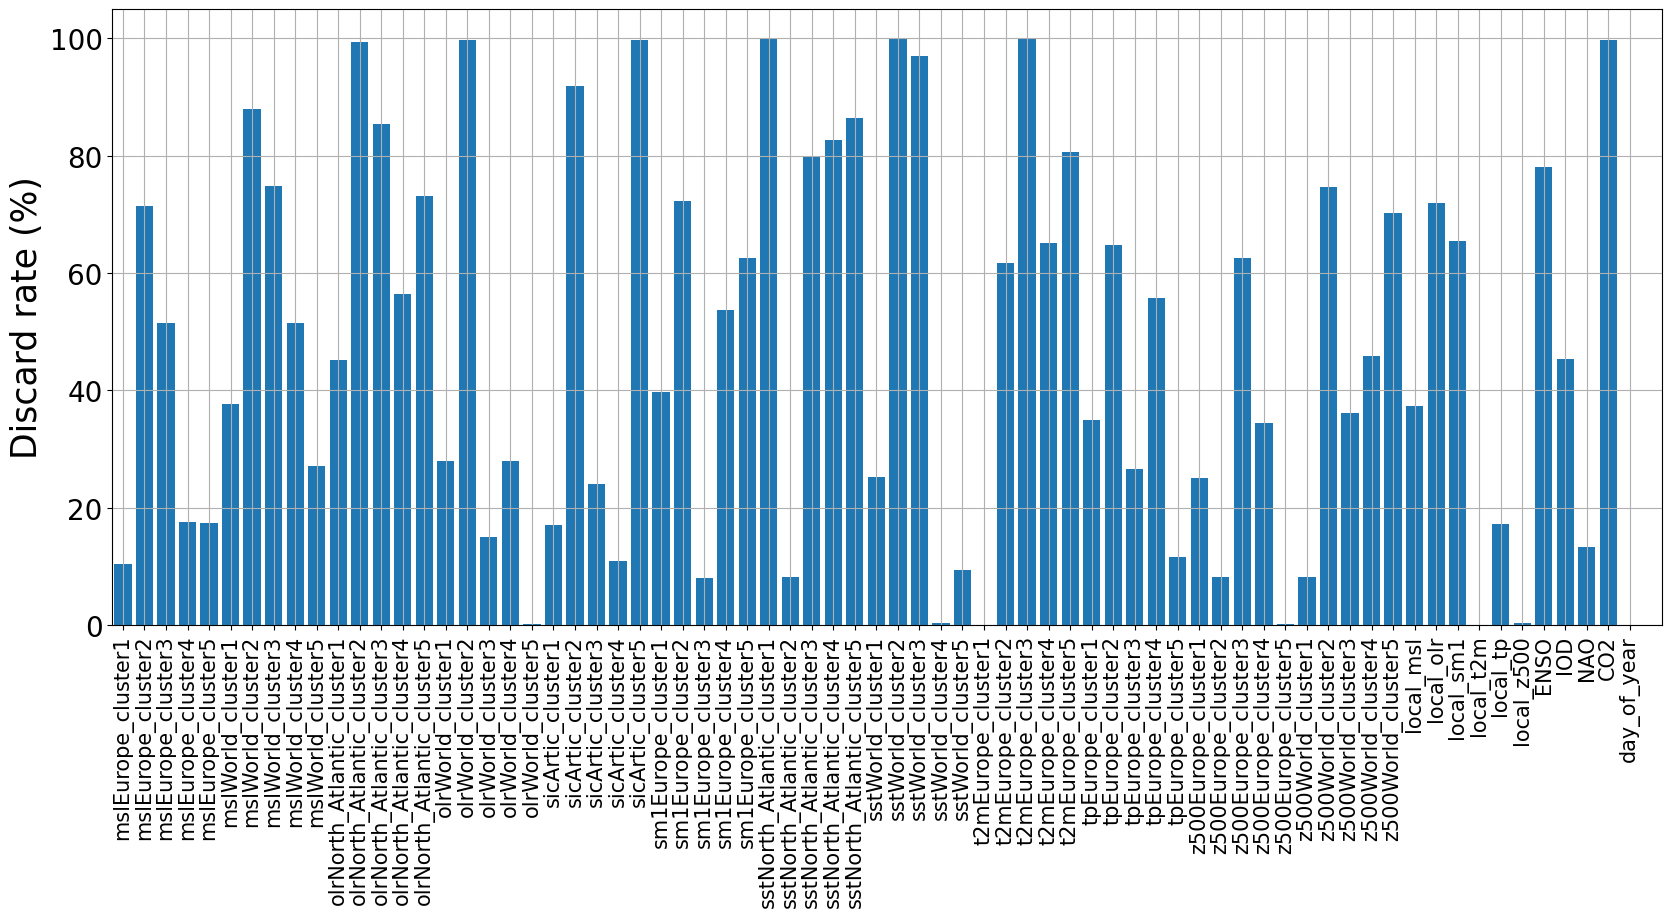

In [77]:
# Plot the discard rate

plt.figure(figsize=(20, 8))
plt.bar(pred_dataframe_opt.columns,discarded[0]*100/len(arrays))
plt.xticks(rotation = 90,fontsize=15)
plt.grid()
# plt.ylim(0,1)
plt.ylabel('Discard rate (%)',fontsize=25)
plt.yticks(fontsize=20)
plt.xlim(-0.5,pred_dataframe_opt.shape[1]+0.5)
plt.savefig(path_figures+'discard_rate_table_HW_noT2M.eps', format='eps', dpi=1000, bbox_inches = 'tight')